<a href="https://colab.research.google.com/github/Ajaya210/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Airline Passenger Referral Prediction



**Project Type**    -Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Ajaya Kumar Pradhan


# **Project Summary & Technical Documentation-**

Air travel has dramatically transformed the landscape of global connectivity, standing out as one of the most significant breakthroughs of the twentieth century. Its defining characteristic, speed, has rendered it an essential mode of transport for both individuals and goods.

In the ever-evolving realm of aviation, passenger experience plays a pivotal role in determining success. The capacity to forecast passenger endorsements and recommendations has emerged as a strategic necessity for airlines. Gaining insights into which passengers are inclined to recommend an airline to their social circles can be a transformative factor in boosting customer satisfaction and driving revenue growth.

### Work Flow:-

* **Data Collection**
* **Data Cleaning & Preprocessing**:- This includes handling missing value, outliers treatment target encoding & feature enginnering.
* **Exploratory Data Analysis (EDA):-** This include visualization of the data using various graphs & plots.
* **Splitting the Data into training & testing part**
* **Model Selection and Hyperparameter Tuning:-**To develop an accurate prediction system, a diverse array of classification models is employed. These models include Logistic Regression,Random Forests, & Support Vector Machines (SVM). Ensuring model reliability, hyperparameter tuning is performed to optimize performance and mitigate overfitting.
* **Evaluation Metrics:-**The core focus of the analysis is on classification metrics, with Recall as the highest priority. Accuracy and ROC AUC follow closely behind. These metrics gauge the models' ability to correctly identify passengers who recommend airlines, crucial for targeting customer engagement efforts effectively.

## GitHub Link -
https://github.com/Ajaya210/Airline-Passenger-Referral-Prediction/blob/main/ML_Classification_project_on_Airline_Passenger_Referral_Prediction.ipynb

# **Problem Statement**


In the fast-paced and fiercely competitive world of aviation, customer satisfaction and loyalty are key determinants of an airline’s success. Airlines are perpetually exploring novel methods to elevate passenger experiences and bolster their brand image. A crucial element in realizing these goals is the capability to foresee which passengers are prone to endorse the airline within their social circles.

The challenge we face involves the creation of a predictive model that can precisely pinpoint passengers who are likely to advocate for the airline. This predictive model will act as a strategic instrument for airlines to:

1.Enhance their customer service by focusing on passengers who are potential advocates.

2.Tailor their marketing and loyalty programs towards passengers who are more likely to recommend their services.

3.Improve their overall brand reputation by increasing the number of positive referrals.

4.Make informed business decisions based on the insights derived from the model.

5.Ultimately, drive revenue growth by converting satisfied passengers into brand advocates.

-Enhance Customer Satisfaction

-Drive Revenue Growth

-Optimize Marketing Efforts

-Improve Service Quality

-Gain a Competitive Edge

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importing all models from sklearn to be used in model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing  metrics for evaluation of models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#load the dataset from drive
airline_df = pd.read_excel("/content/drive/MyDrive/airline dataset/data_airline_reviews.xlsx")

### Dataset First View

In [ ]:
# Dataset First Look
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list(airline_df.columns)

['airline',
 'overall',
 'author',
 'review_date',
 'customer_review',
 'aircraft',
 'traveller_type',
 'cabin',
 'route',
 'date_flown',
 'seat_comfort',
 'cabin_service',
 'food_bev',
 'entertainment',
 'ground_service',
 'value_for_money',
 'recommended']

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
airline_df.shape

(131895, 17)

### Dataset Information

In [ ]:
# Dataset Info
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
airline_df.duplicated().sum()

70711

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values=airline_df.isnull().sum()
missing_values

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

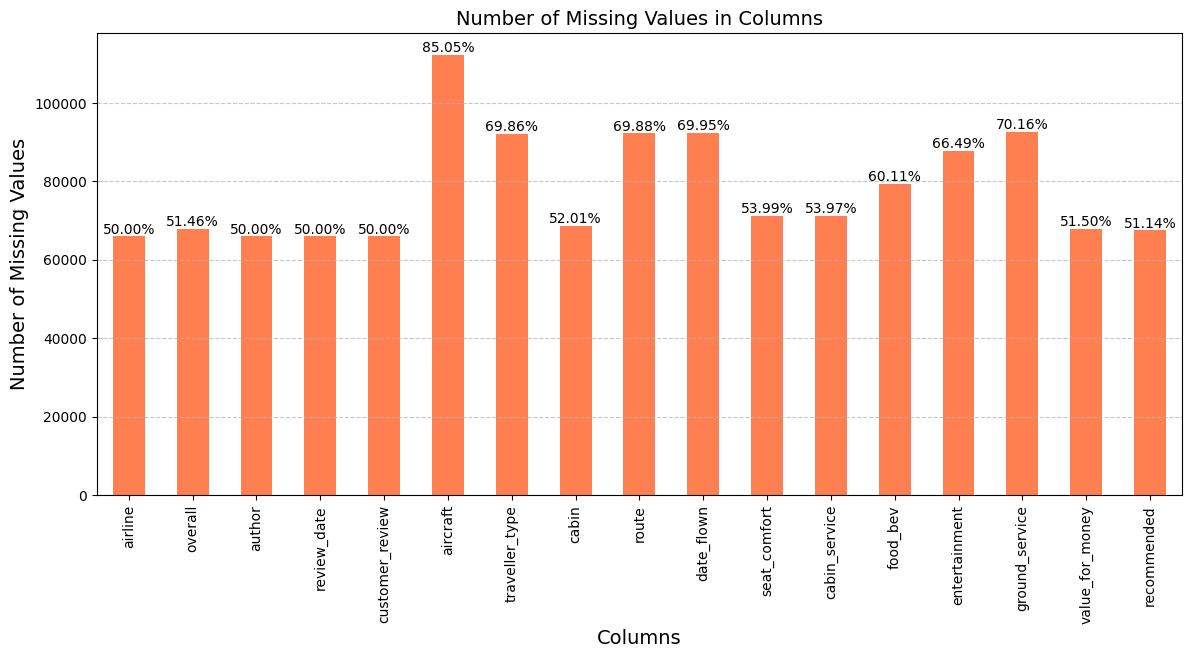

In [ ]:
# Visualizing the missing values

columns_with_missing_values = missing_values[missing_values > 0]      #  Filter columns with missing values

# Calculate the percentage of missing values in each column
total_rows = len(airline_df)
percentage_missing = (columns_with_missing_values / total_rows) * 100

# Create a bar chart
plt.figure(figsize=(14, 6))
bar_plot = columns_with_missing_values.plot(kind='bar', color='coral')
plt.xlabel('Columns',fontsize=14)
plt.ylabel('Number of Missing Values',fontsize=14)
plt.title('Number of Missing Values in Columns',fontsize=14)
plt.xticks(rotation=90, ha='center',fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the percentage of missing values on top of each bar
for index, value in enumerate(columns_with_missing_values):
    plt.text(index, value, f'{percentage_missing[index]:.2f}%', ha='center', va='bottom',fontsize=10)

plt.show()

### What did you know about your dataset?

The dataset is well-prepared for further analysis, as it contains 131895 rows and 17 features. There are some missing values in every feature, which need to be fixed either by using the fillna method or dropping the rows. Additionally, there are 70711 duplicate rows, which also need to be dropped so that there is a clean and unique dataset for analysis. Most of the features are either objects or floats. If necessary, it needs to be converted into the required datatype. After the necessary cleaning, the dataset will be ready for preprocessing steps, allowing the focus to be on feature engineering and model development to achieve accurate predictions.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(airline_df.columns)

['airline',
 'overall',
 'author',
 'review_date',
 'customer_review',
 'aircraft',
 'traveller_type',
 'cabin',
 'route',
 'date_flown',
 'seat_comfort',
 'cabin_service',
 'food_bev',
 'entertainment',
 'ground_service',
 'value_for_money',
 'recommended']

In [ ]:
# Dataset Describe
airline_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Variables Description

**airline:** Name of the airline.

**overall:** Overall point is given to the trip between 1 to 10.

**author:** Author of the trip

**review date:** Date of the Review

**customer review:**Review of the customers in free text format

**aircraft:** Type of the aircraft

**traveller type:** Type of traveler (e.g. business, leisure)

**cabin:** Cabin at the flight date flown: Flight date

**seat comfort:** Rated between 1-5

**cabin service:** Rated between 1-5

**foodbev:** Rated between 1-5

**entertainment:** Rated between 1-5

**ground service:** Rated between 1-5

**value for money:** Rated between 1-5

**recommended**: Binary, target variable.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
airline_df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

In [ ]:
#Checking the unique values of the target variable
airline_df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Dropping the column with more than 80 % empty columns
airline_df = airline_df.drop(columns='aircraft',axis=1)

#droping the duplicate values
airline_df.drop_duplicates(inplace = True)

# Convert the "review_date" & "date_flown" column from object to datetime data type
airline_df['review_date'] = pd.to_datetime(airline_df['review_date'])
airline_df['date_flown'] = pd.to_datetime(airline_df['date_flown'])

# Extract the year from the "date_flown" column and create a new column "year"
airline_df['year'] = airline_df['date_flown'].dt.year


In [ ]:
# Check the changes made in dataset
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61184 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   overall          59401 non-null  float64       
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  datetime64[ns]
 4   customer_review  61183 non-null  object        
 5   traveller_type   37540 non-null  object        
 6   cabin            58705 non-null  object        
 7   route            37513 non-null  object        
 8   date_flown       37434 non-null  datetime64[ns]
 9   seat_comfort     56211 non-null  float64       
 10  cabin_service    56240 non-null  float64       
 11  food_bev         48341 non-null  float64       
 12  entertainment    40230 non-null  float64       
 13  ground_service   37169 non-null  float64       
 14  value_for_money  59327 non-null  floa

In [ ]:
airline_df.shape

(61184, 17)

### What all manipulations have you done and insights you found?

The column "aircraft" has more than 80% of the missing values. Hence, this column is removed. After that, the duplicated rows are deleted. These two cleaning processes reduce some of the missing entries. The datatype of the "review date" and "date_flown" columns is incorrect & hence changed to the datetime datatype. A new column for year has been created from the "date_flown" column.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Chart - 1 Check the nature of data set: balanced or imbalanced?**

In [ ]:
airline_df['recommended'].value_counts()

no     31268
yes    28493
Name: recommended, dtype: int64

In [ ]:
percentage = airline_df['recommended'].value_counts(normalize=True) * 100
print(percentage)

no     52.321748
yes    47.678252
Name: recommended, dtype: float64


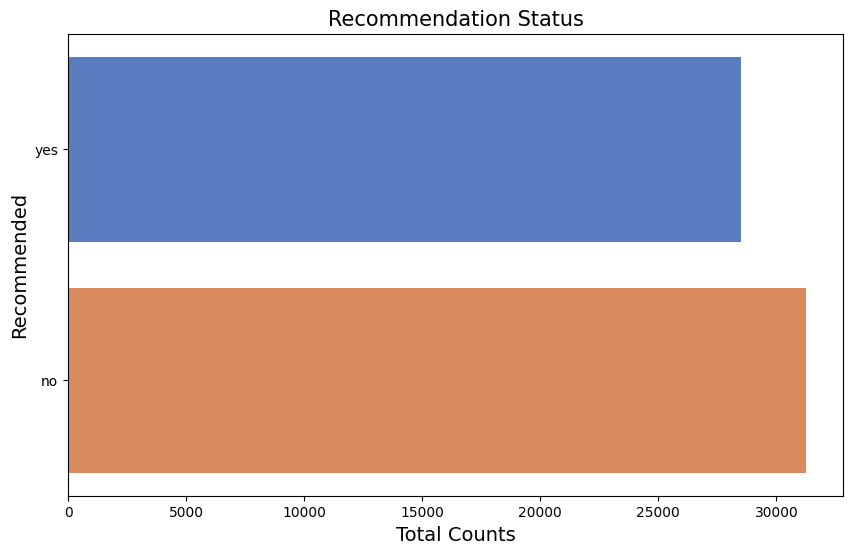

In [ ]:
plt.figure(figsize=(10, 6))

palette = sns.color_palette()

# Create a countplot of the 'recommended' data
sns.countplot(airline_df['recommended'], palette='muted')

# Set the x-axis label
plt.xlabel('Total Counts', fontsize=14)

# Set the y-axis label
plt.ylabel('Recommended', fontsize=14)

# Set the title of the plot
plt.title('Recommendation Status', fontsize=15)

plt.show()


##### 1. Why did you pick the specific chart?

**Ans:** The countplot allows for a direct visual comparison of the counts of "Yes" and "No" recommendations. By using a single plot, we can easily compare the frequencies of these two categories.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** The above plot shows a distribution of around 52%:48% between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special treatment/resampling.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** The bar plot showing recommendation frequency can have both positive and potentially negative impacts on a business, depending on how they are interpreted and acted upon.

**Positive Business Impact**:

> **Strategic Decision-Making**: Understanding the proportion of customers who recommend the business's offerings can inform strategic decisions. It can guide marketing strategies, product development, and customer service improvements that align with customer preferences and satisfaction.

**Negative Business Impact**:

>  **Overlooking Negative Feedback**: Focusing solely on the positive recommendations may cause the business to overlook or dismiss critical negative feedback. Ignoring negative feedback can hinder efforts to address underlying issues and improve the customer experience.


**Chart - 2 Check the distribution of traveller types**

In [ ]:
traveller_type_counts=airline_df['traveller_type'].value_counts()
print('traveller_type_counts')

traveller_type_counts


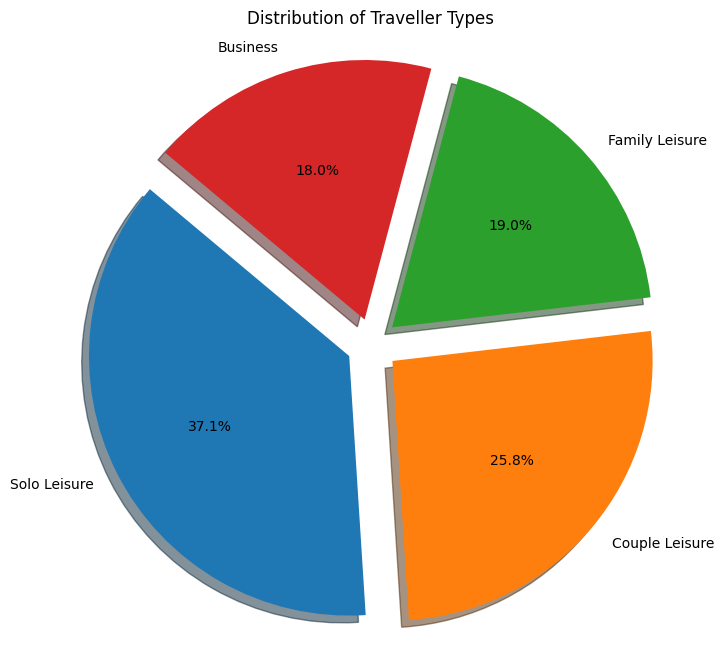

In [ ]:
# Chart - 2 visualization code
# Create a pie chart
plt.figure(figsize=(8, 8))
# Create the pie chart with the explode effect and a shadow
labels = traveller_type_counts.index
sizes =traveller_type_counts.values
explode = [0.1]*len(sizes)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True ,startangle=140,)
plt.title('Distribution of Traveller Types')
plt.axis('equal')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:** The "traveller_type" column contains categorical data, which means it consists of distinct categories or labels (e.g., "Business," "Leisure"). Pie-chart are particularly useful for visualizing the distribution of categorical data.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** The bigger sector in the pie-chart represent the most frequently occurring traveler types. This can help us identify dominant or prevalent traveler types in the dataset.

* "Solo Travellers" constitue 37.1% of overall travellers type & contribute the biggest share in pie-chart followed by "Couple Travellers" which constitue 25.8% of overall travellers type.

* Business Travellers has the smallest share in travellers type distribution pie-chart.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** A pie-chart of traveler types alone may not directly lead to a positive or negative business impact, as they provide foundational information about the distribution of customers but may not reveal the full picture of customer behavior or preferences. However, these insights can inform further analysis and decision-making, which can potentially impact the business positively or negatively depending on how they are leveraged.

**Potential Positive Impacts:**

> **Customer Segmentation:** Understanding the distribution of traveler types can help in segmenting the customer base. This segmentation can lead to targeted marketing strategies and personalized services, which can enhance customer satisfaction and loyalty.

**Potential Negative Impacts:**

> **Neglect of Minority Traveler Types:** Focusing solely on the most common traveler types may lead to neglecting the needs and preferences of minority traveler groups. This could result in decreased satisfaction and loyalty among those customers.

#### Chart - 3 Recommendation based on Cabin Type

In [ ]:
airline_df['cabin'].value_counts()

Economy Class      45171
Business Class      9590
Premium Economy     2412
First Class         1532
Name: cabin, dtype: int64

In [ ]:
airline_df['cabin'].nunique()

4

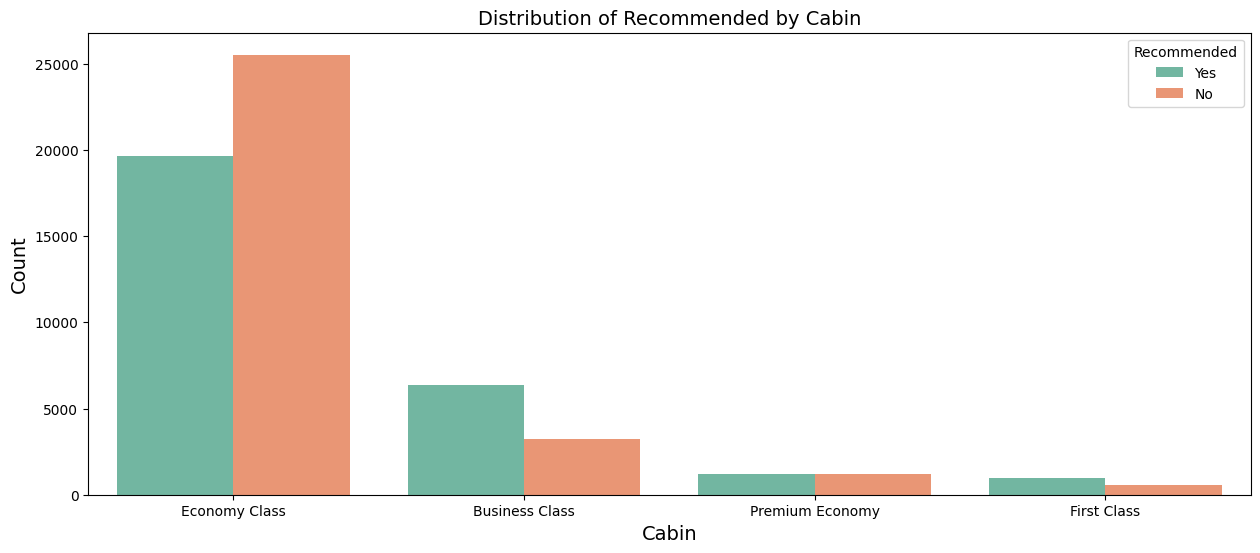

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(15, 6))
sns.countplot(data=airline_df, x='cabin', hue='recommended', palette='Set2')
plt.title('Distribution of Recommended by Cabin', fontsize=14)
plt.xlabel('Cabin', fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.legend(title='Recommended', labels=['Yes', 'No'])
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:** The countplot with the hue parameter is an effective choice when we want to compare the distribution of a binary variable (such as "recommended") within different categories (in this case, "cabin" types). It allows for clear visualization and comparison, which can lead to insights about customer preferences and recommendations across cabin types.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** The chart highlights variations in the distribution of recommendations across different cabin types. For instance-
* In the "Economy" cabin, there are both more recommendations and more non-recommendations compared to other cabins.

* In contrast, "First" cabin passengers seem to have a higher rate of recommendations compared to non-recommendations.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.


**Ans:** The countplot of "recommended" values within each "cabin" category can potentially have both positive and negative implications for a business, depending on how the insights are leveraged and acted upon.

**Positive Business Impact:**

> Targeted Marketing: The insights can inform targeted marketing strategies. Airlines can focus their marketing efforts on promoting the features and benefits of cabin types that receive high recommendations, attracting more customers to those premium offerings.

**Negative Business Impact:**

> Missed Revenue Opportunities: Ignoring insights about low recommendation rates may result in missed revenue opportunities. By not addressing passenger concerns and improving services in underperforming cabins, airlines may lose potential revenue from dissatisfied customers.

#### Chart - 4 "Traveler Ratings: Value for Money Across Different Traveler Types"

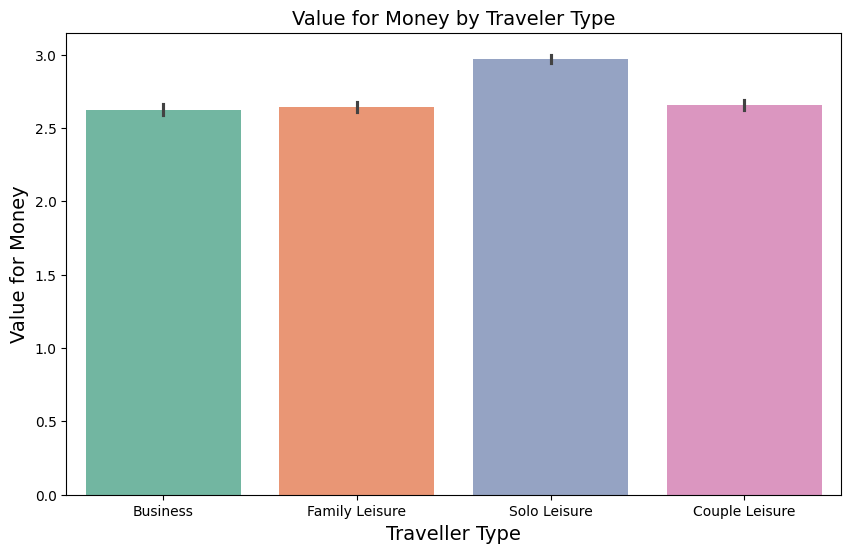

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))

# Create a barplot with the 'Set1' color palette
sns.barplot(x='traveller_type', y='value_for_money', data=airline_df, palette='Set2')

plt.title('Value for Money by Traveler Type',fontsize=14)
plt.xlabel('Traveller Type',fontsize=14)
plt.ylabel('Value for Money',fontsize=14)

plt.show()

##### 1. Why did you pick the specific chart?

**Ans:** Bar plots are easy to understand. They display discrete categories on the x-axis and the numerical variable on the y-axis, making it straightforward for viewers to interpret the data.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** We can see how different traveller types rate the "value_for_money" aspect of the airline service.

*   The Solo Traveller have given highest rating for "Value For Money" while there are almost equal rating given by rest of the traveller.
*   This can help identify which traveller type, such as business travellers, leisure travellers, or others, find the service to be of better value.







##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:**  Analyzing the chart of traveler types and their ratings for "value_for_money" can potentially lead to both positive and negative business impacts, depending on the specific findings and how they are acted upon.

**Positive Business Impacts**:

> **Service Improvement**: By identifying traveller types with lower ratings for "value_for_money," the airline can investigate why these travelers feel this way. This feedback can guide improvements in pricing, amenities, or services to enhance customer satisfaction.

**Negative Business Impacts**:

> **Customer Churn**: If certain traveller types consistently rate the airline's "value_for_money" poorly and these issues are not addressed, it could lead to customer churn. Unaddressed negative feedback can result in the loss of valuable customers.

#### Chart - 5 "Airline Seat Comfort Ratings: Top Airlines for Passenger Comfort"

In [ ]:
airline_df['airline'].value_counts()

Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64

In [ ]:
airline_df['airline'].nunique()

81

In [ ]:
# Calculate the average of seat comfort rating for each airline
avg_seat_comfort = airline_df.groupby('airline')['seat_comfort'].mean().reset_index()

# Sort the DataFrame by average seat comfort ratings in descending order
avg_seat_comfort_sorted = avg_seat_comfort.sort_values(by='seat_comfort', ascending=False)
print(avg_seat_comfort_sorted)

                    airline  seat_comfort
37         Garuda Indonesia      4.343365
29                  EVA Air      4.149780
18          Asiana Airlines      4.039370
26  China Southern Airlines      4.029184
54            Qatar Airways      3.971800
..                      ...           ...
76                  WOW air      2.100000
75         Vueling Airlines      2.063041
36        Frontier Airlines      1.820685
8          Air Canada rouge      1.714004
63          Spirit Airlines      1.705861

[81 rows x 2 columns]


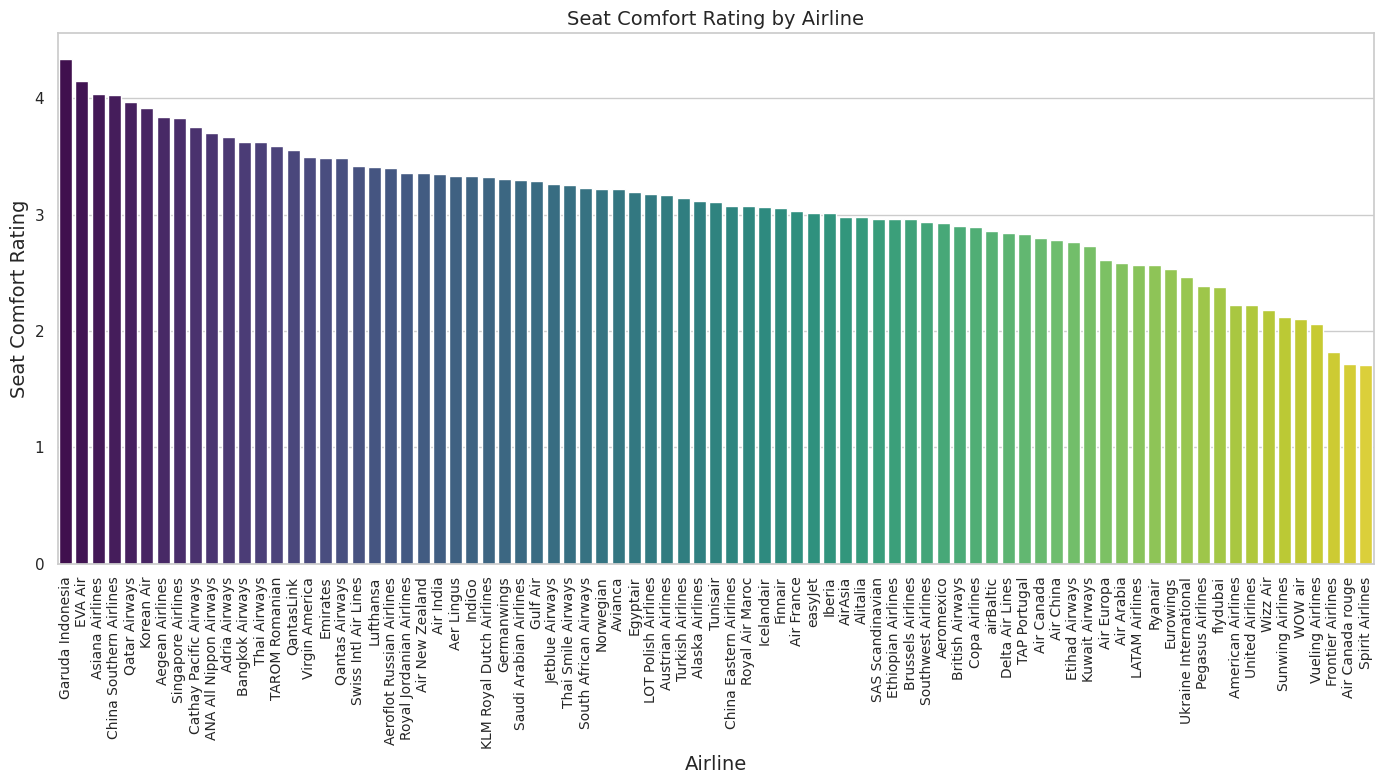

In [ ]:
# Chart - 5 visualization code
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create a barplot
sns.barplot(x='airline', y='seat_comfort', data=avg_seat_comfort_sorted, palette='viridis')

plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Seat Comfort Rating', fontsize=14)
plt.title('Seat Comfort Rating by Airline', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

1.Why did you pick the specific chart?

**Ans:** Bar plots are effective for comparing the values of a single variable (in this case, "seat_comfort" ratings) across different categories (airlines). They allow you to easily see and compare how the ratings vary for each airline.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** The Seat Comfort rating of some airlines, such as "Air Canada", "Frontier Airlines," and "Spirit Airlines," is very poor compared to the average rating of all other airlines. While some airlines, such as "Asiana Airline","EVA Air", "China Southern Airlines," and "Garuda Airlines, are rated the best compared to other airlines.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** Analyzing seat comfort ratings by passenger can have both positive and potentially negative impacts on airlines' business strategies.

**Positive Business Impact**:

> **Pricing Strategies**: Airlines with exceptional seat comfort may have the opportunity to position themselves as premium carriers and charge higher ticket prices. Passengers may be willing to pay more for increased comfort, leading to higher revenue per passenger.

**Negative Business Impact**:

> **Customer Churn**: Airlines with consistently low seat comfort ratings may experience customer churn as passengers opt for competitors with better comfort offerings. This can lead to a loss of revenue and market share.

#### Chart - 6 "Average Cabin Service Ratings by Airline"

In [ ]:
# Calculate the average cabin service rating for each airline
avg_seat_comfort = airline_df.groupby('airline')['cabin_service'].mean().reset_index()

# Sort the DataFrame by average seat comfort ratings in descending order
avg_seat_comfort_sorted = avg_seat_comfort.sort_values(by='cabin_service', ascending=False)
print(avg_seat_comfort_sorted)

                    airline  cabin_service
37         Garuda Indonesia       4.559508
0    ANA All Nippon Airways       4.541209
18          Asiana Airlines       4.454068
26  China Southern Airlines       4.401669
29                  EVA Air       4.372247
..                      ...            ...
73          United Airlines       2.433496
17        American Airlines       2.362184
75         Vueling Airlines       2.258065
63          Spirit Airlines       2.087166
36        Frontier Airlines       2.067729

[81 rows x 2 columns]


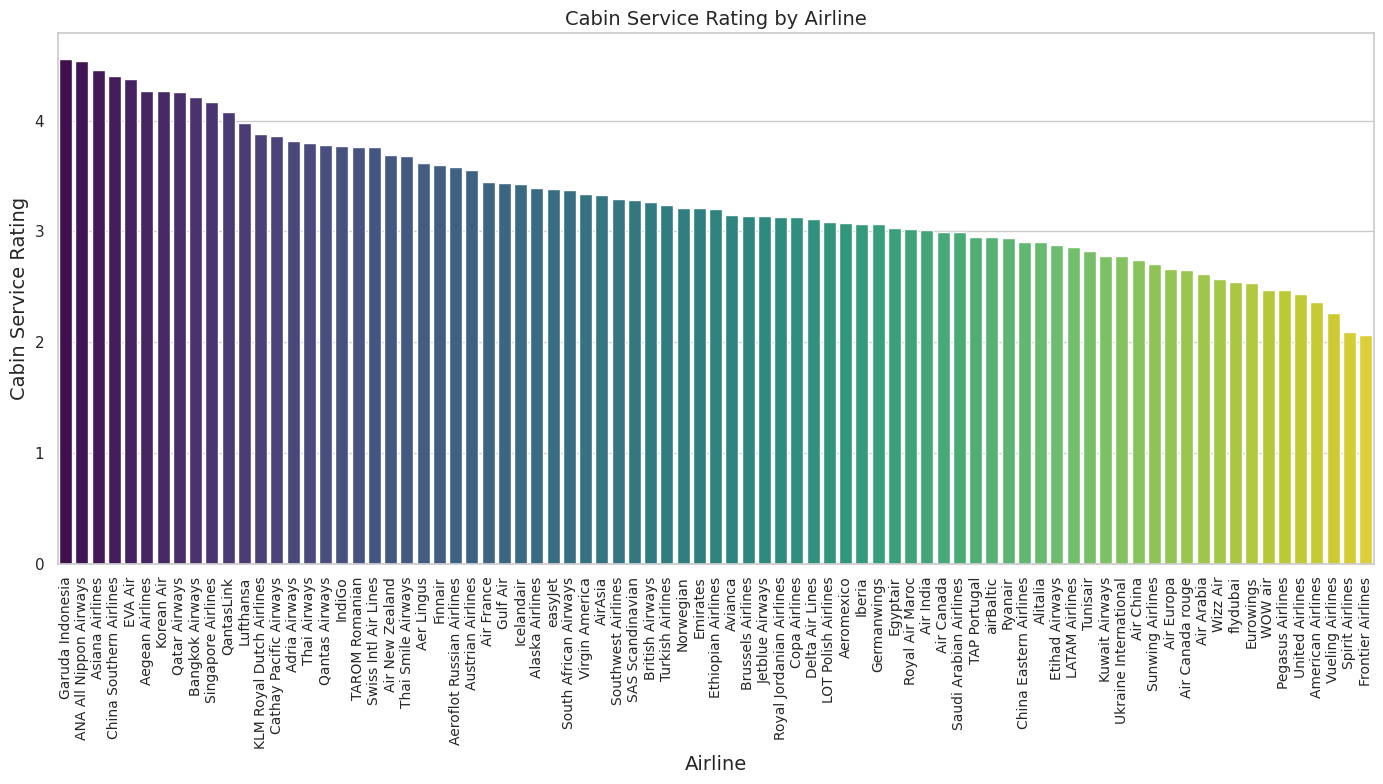

In [ ]:
# Chart - 6 visualization code
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x='airline', y='cabin_service', data=avg_seat_comfort_sorted, palette='viridis')

plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Cabin Service Rating', fontsize=14)
plt.title('Cabin Service Rating by Airline', fontsize=14)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:** Bar charts are commonly used to display and compare data for different categories. It allows for easy comparison between different airlines' cabin service ratings. The bars make it straightforward to see which airlines have higher or lower ratings.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** The chart clearly shows that "Garuda Indonesia" ""Nippon Airways" etc. have the highest cabin service ratings while "Frontier Airlines" & "Spirit Airlines" have the lowest cabin service ratings. This allows viewers to quickly identify the best and worst performers airlines in terms of cabin service.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** The chart can indeed help create a positive business impact for airlines. However, they can also potentially lead to negative growth if not acted upon appropriately.

**Positive Business Impact:**

> **Competitive Advantage**: Airlines with higher cabin service ratings can leverage this information to promote their superior service in marketing and advertising campaigns. This can attract more passengers who value quality service, potentially leading to increased market share and revenue.

**Negative Growth Potential:**

> **Inaction**: One of the most significant potential negative impacts is inaction. If airlines do not address the issues highlighted by low cabin service ratings, they risk losing customers to competitors who offer better service. This can result in decreased revenue and market share.

#### Chart - 7 "Average Food and Beverage Ratings by Airline

In [ ]:
# Calculate the average food beverages rating for each airline
avg_seat_comfort = airline_df.groupby('airline')['food_bev'].mean().reset_index()

# Sort the DataFrame by average seat comfort ratings in descending order
avg_seat_comfort_sorted = avg_seat_comfort.sort_values(by='food_bev', ascending=False)

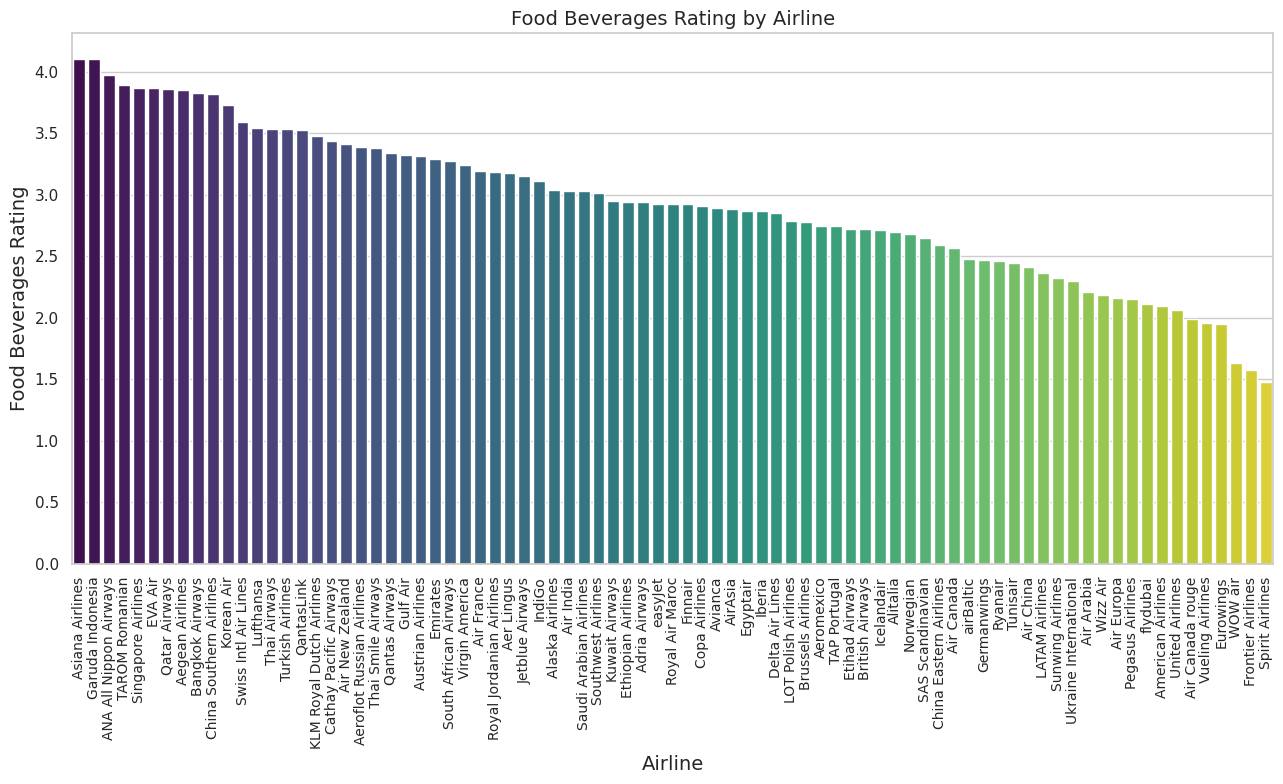

In [ ]:
# Chart - 7 visualization code
sns.set(style="whitegrid")
plt.figure(figsize=(13, 8))
sns.barplot(x='airline', y='food_bev', data=avg_seat_comfort_sorted, palette='viridis')

plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Food Beverages Rating', fontsize=14)
plt.title('Food Beverages Rating by Airline', fontsize=14)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:** A bar chart is an excellent choice when we want to compare the values of a categorical variable (airlines) with respect to a continuous variable (food and beverage ratings). It allows viewers to quickly discern differences in ratings between airlines.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** The chart clearly shows that "Garuda Indonesia" ""Nippon Airways" & "Asiana Airlines" etc. have the highest food beverages rating while "Frontier Airlines" & "Spirit Airlines" have the lowest food beverages ratings. This allows viewers to quickly identify the best and worst performers airlines in terms of Food & Beverages Services.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** Analyzing food and beverage ratings for airlines can indeed have a positive business impact. However, whether they lead to positive or negative growth depends on how the insights are interpreted and acted upon.

**Positive Business Impact:**

> **Revenue Growth**: Positive ratings can lead to higher revenue through increased ticket sales and potentially higher spending by passengers on in-flight dining options.

> **Brand Reputation**: High ratings contribute to a positive brand reputation, which can lead to brand loyalty and the attraction of new customers.

**Negative Business Impact:**

> **Reduced Revenue**: Low ratings can deter passengers from purchasing in-flight meals or snacks, resulting in reduced revenue from onboard sales.

> **Negative Publicity**: Negative feedback about food and beverages on social media or review platforms can harm an airline's image and result in negative publicity.

#### Chart - 8 "Recommendation Count per Airline"

In [ ]:
# Calculate the recommendation count per airline
recommendation_counts = airline_df.groupby(['airline', 'recommended']).size().unstack(fill_value=0)

# Reset the index
recommendation_counts.reset_index(inplace=True)

# Rename the columns
recommendation_counts.columns = ['Airline', 'No', 'Yes']

print(recommendation_counts)

                      Airline   No  Yes
0      ANA All Nippon Airways   76  385
1               Adria Airways   41   42
2             Aegean Airlines  104  417
3                  Aer Lingus  272  430
4   Aeroflot Russian Airlines  179  314
..                        ...  ...  ...
76                    WOW air  428  125
77                   Wizz Air  484  251
78                  airBaltic   99   79
79                    easyJet  462  555
80                   flydubai  139   61

[81 rows x 3 columns]


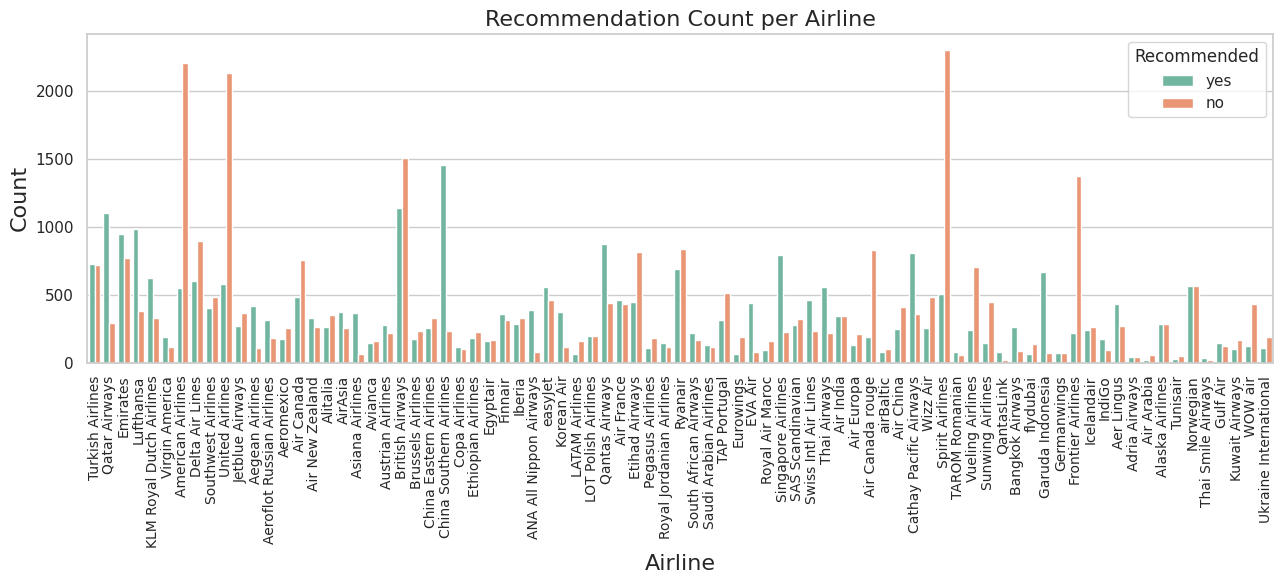

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(13, 6))
sns.countplot(x='airline', hue='recommended', data=airline_df,palette='Set2')
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Airline',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Recommendation Count per Airline',fontsize=16)
plt.legend(title='Recommended')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:** The countplot allows for a direct visual comparison of recommendation counts across multiple airlines. By using the hue parameter to differentiate between "Yes" and "No" recommendations, it's easy to assess the distribution of recommendations for each airline.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** From the countplot that visualizes the recommendation counts for each airline, we can derive several insights and observations:


> **Most Recommended Airlines:** Qatar Airlines, Singapore Airlines, China Southern Airlines, Garuda Airlines & Qantas Airlines have a higher count of "Yes" recommendations. These airlines are likely providing a positive experience to passengers, leading to more recommendations.

> **Least Recommended Airlines:** American Airlines, United Airlines, Spirit Airlines & Frontier Airlines have a higher count of "No" recommendations. These airlines may have areas for improvement in their services or customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** The recommendation counts for each airline can indeed help create a positive business impact. However, the actual impact depends on how airlines respond to these insights.

**Positive Business Impact**:

> **Customer Loyalty**: Airlines with higher counts of "Yes" recommendations have the potential to build strong customer loyalty. This can lead to repeat business, positive word-of-mouth recommendations, and an increase in customer lifetime value.

> **Strategic Decision-Making**: Airlines can use these insights to make informed strategic decisions, such as investing in service enhancements, training staff, or upgrading amenities to meet passenger expectations.

**Negative Business Impact**:

> **Customer Churn**: Airlines with consistently high counts of "No" recommendations may experience customer churn. Passengers may choose competitors with better ratings, leading to a loss of revenue and market share.

> **Reputation Damage**: Persistently poor recommendation counts can harm an airline's reputation. Negative reviews and low recommendations can deter potential customers and erode trust in the brand.

#### Chart - 9 "Average Ratings of Services by Cabin Type"

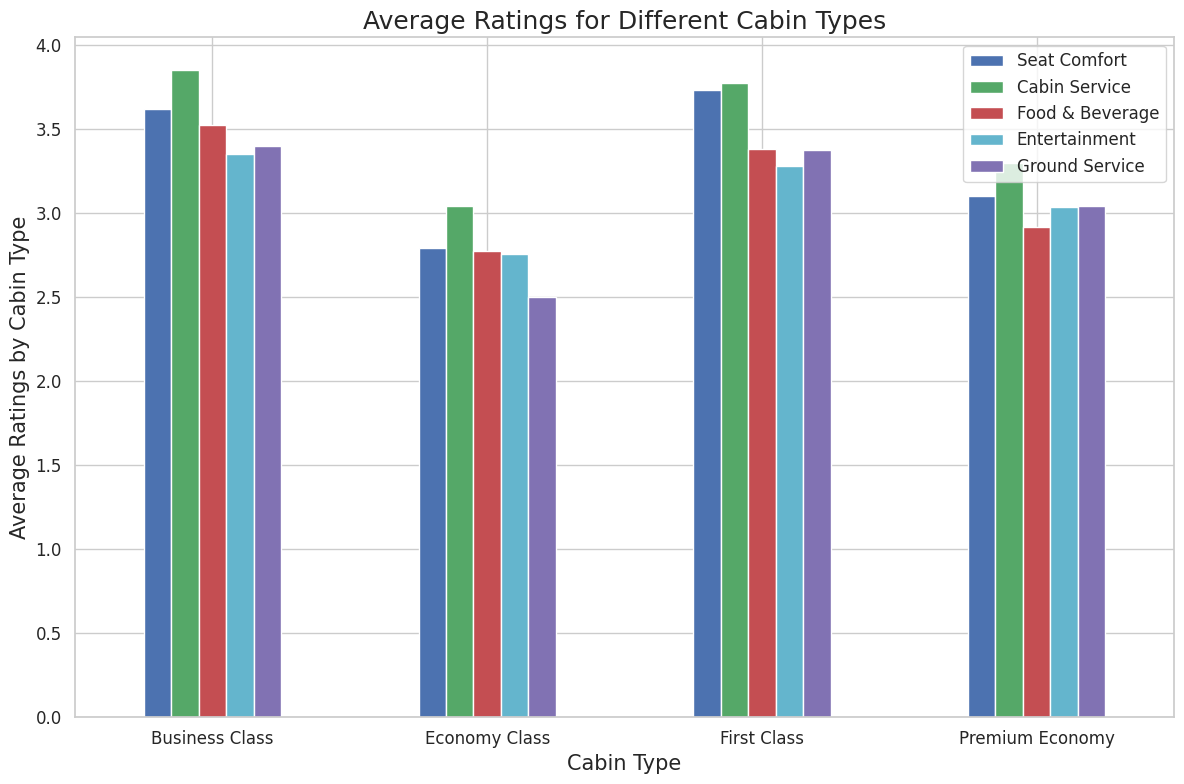

In [ ]:
# Chart - 19 visualization code

# Calculate the average ratings for 'seat_comfort','cabin_service','food_bev', 'entertainment','ground_service' by cabin
average_ratings = airline_df.groupby('cabin')[['seat_comfort','cabin_service','food_bev', 'entertainment','ground_service']].mean().reset_index()

# Set the figure size
plt.rcParams['figure.figsize']=(12,8)

# Define the color list for the bars
colors = ['b', 'g', 'r', 'c', 'm']

# Plot the data
average_ratings.plot(x="cabin", y=['seat_comfort','cabin_service','food_bev', 'entertainment','ground_service'], kind="bar", color=colors, fontsize=12)

# Set labels and title
plt.xlabel("Cabin Type",fontsize=15)
plt.ylabel("Average Ratings by Cabin Type",fontsize=15)
plt.title("Average Ratings for Different Cabin Types", fontsize=18)

# Set legend
plt.legend(["Seat Comfort", "Cabin Service", "Food & Beverage", "Entertainment", "Ground Service"], fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

**Ans:** A grouped bar chart is an effective way to compare and visualize the average ratings of different factors for each cabin type. Each factor is represented by a distinct bar, and the bars are grouped by cabin type. This clear differentiation makes it easy to identify and compare ratings for each factor within each cabin type.

##### 2. What is/are the insight(s) found from the chart?

*   The average rating of all services types for Business Class as well as First Class cabin type is best.
*   Economy Class is worst rated in all the service types.


##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially have a positive business impact for the airline. However, there may also be insights that could indicate areas of concern or potential negative growth.

**Positive Business Impact:**

> **Marketing and Pricing Strategies**: Understanding which cabin types receive higher ratings for specific categories enables the airline to target marketing efforts more effectively. They can promote the strengths of certain cabins and tailor pricing strategies to appeal to different customer preferences.

**Negative Growth or Concerns:**

> **Operational Challenges**: Insights into lower ratings for specific services or cabin types may signal operational challenges that need immediate attention. Failure to address these issues could result in negative growth as passengers seek better experiences elsewhere.

#### Chart 10- Overall Rating by Passenger vs. Airline

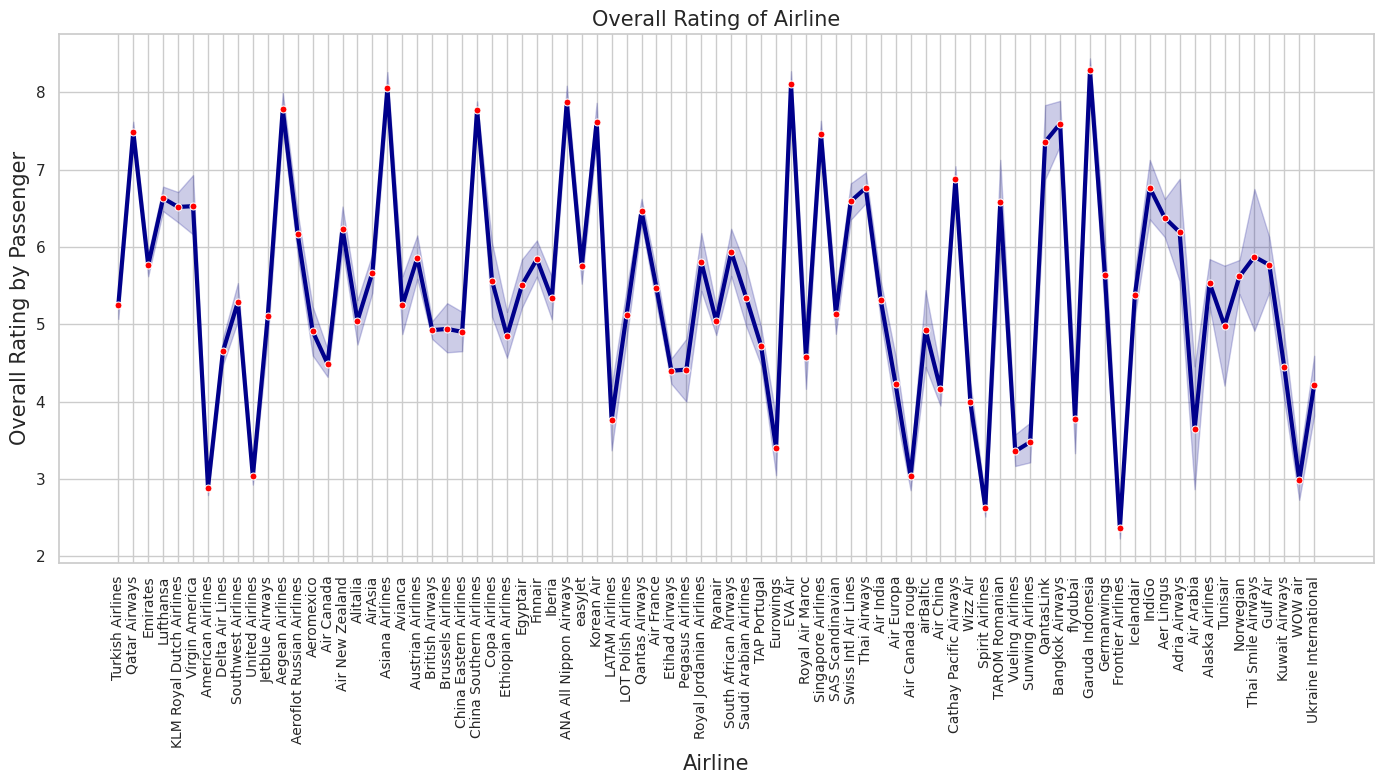

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")  # Set style to whitegrid for better readability
sns.lineplot(x='airline', y='overall', data=airline_df, marker='o', markersize=5, color='darkblue', markerfacecolor='red',linewidth=3)

plt.xlabel('Airline', fontsize=15)
plt.ylabel('Overall Rating by Passenger', fontsize=15)
plt.title('Overall Rating of Airline', fontsize=15)
plt.xticks(rotation=90, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

**Ans:-** Line plots are excellent for showing continuous trends or patterns in data. They connect data points with lines, making it easier to identify trends or fluctuations over time.

##### 2. What is/are the insight(s) found from the chart?

**Ans:**The chart can offer insights into customer overall rating for different airlines. We can clearly observe that "Garuda Airlines","Asiana Airline" & "EVA Air" have the highest overall rating while "Frontier Airlines", "Spirit Airlines","American Airlines" & "Delta Airlines" are worst rated airlines.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** The gained insights from the analysis of airline ratings can indeed help create a positive business impact for airlines. However, some insights may lead to negative growth if not addressed effectively.

**Positive Business Impact:**

* **Identification of Top-Rated Airlines**: Airlines with higher ratings can use this information to market themselves as customer favorites and attract more passengers. They can can leverage their positive reputation to gain a competitive advantage in the market. This can lead to increased market share and revenue growth.

**Potential Negative Growth:**


* **Customer Attrition**: Passengers dissatisfied with low-rated airlines may choose alternative modes of transportation or opt for competitors, resulting in customer attrition and revenue loss. These Airlines may struggle with operational challenges, including increased customer complaints, regulatory scrutiny, and employee morale issues.


#### Chart - 11- Top 50 Most Traveled Routes

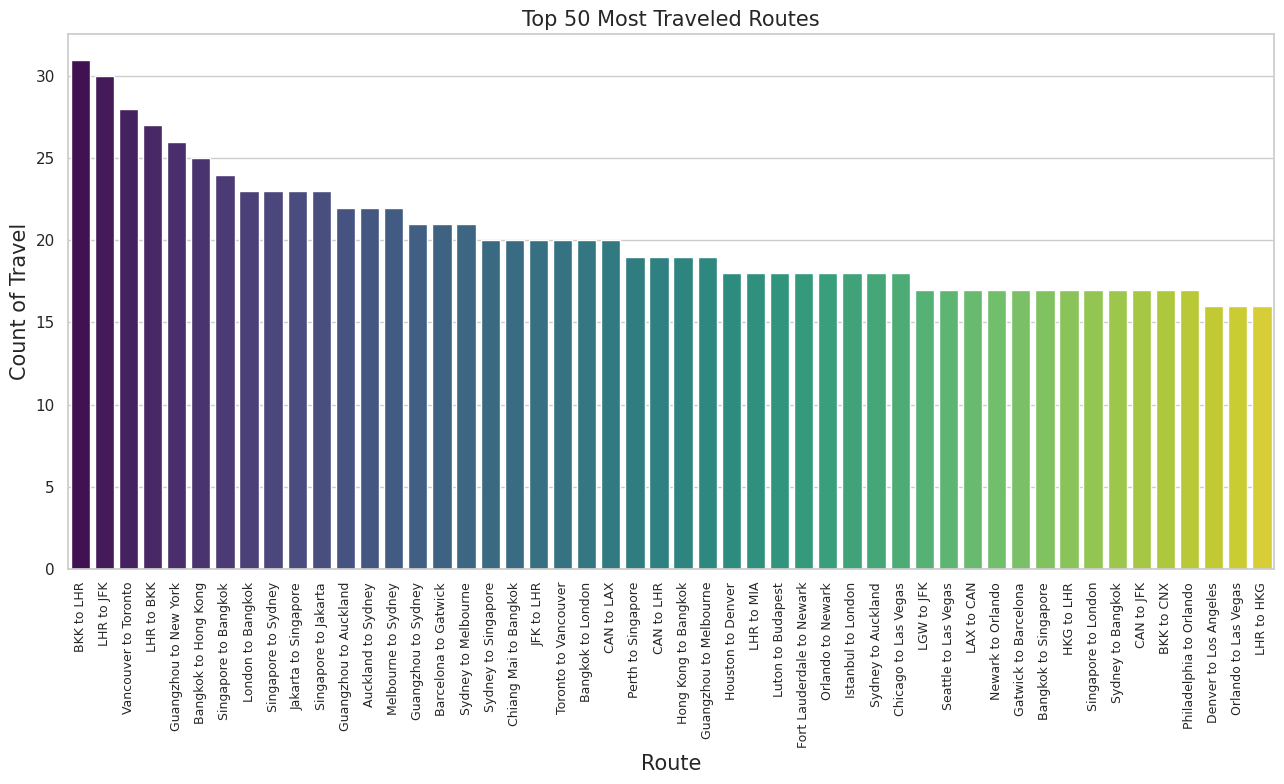

In [ ]:
# Chart - 11 visualization code

# Count the occurrences of each unique route
route_counts = airline_df['route'].value_counts()

# Select the top 50 most traveled routes
top_50_routes = route_counts.head(50)

# Set the figure size
plt.figure(figsize=(13, 8))

# Create a bar plot for the top 10 most traveled routes
sns.barplot(x=top_50_routes.index, y=top_50_routes.values, palette='viridis')

plt.xlabel('Route',fontsize=15)
plt.ylabel('Count of Travel',fontsize=15)
plt.title('Top 50 Most Traveled Routes',fontsize=15)
plt.xticks(rotation=90,fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

**Ans:-** Bar charts are suitable for nominal or categorical data, where categories do not have a natural order.

##### 2. What is/are the insight(s) found from the chart?

**Ans:-**

* **Route Popularity**: The chart clearly highlights the popularity of certain routes such as Bangkok-London(BKK to LHR) & London-New York(LHR to JFK) is mostly travelled route while London-HongKong (LHR to HKG) & Orlando-Las Vegas is less travelled route.

* **Highly Traveled Routes**: Routes at the top of the chart, likely have a significant volume of passenger traffic.

* **Variability in Travel**: While some routes are highly traveled, others have lower counts. This variability in travel frequencies suggests that passenger demand and route popularity vary across different routes.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** The analysis from the top 50 most traveled routes can potentially have both positive and negative impacts on an airline's business.

**Positive Business Impact:**

* **Optimized Resource Allocation**: Understanding which routes are the most traveled allows airlines to allocate their resources more efficiently. They can schedule more flights or use larger aircraft on high-traffic routes, ensuring they meet passenger demand and maximize revenue.

**Negative Business Impact:**

* **Competition**: High-traffic routes often attract competition from other airlines. While this can lead to choices for passengers, it can also result in fare wars and reduced profit margins if airlines engage in aggressive pricing strategies to compete for passengers.

#### Chart - 12 - Airlines vs. Frequency on Most Travelled Routes

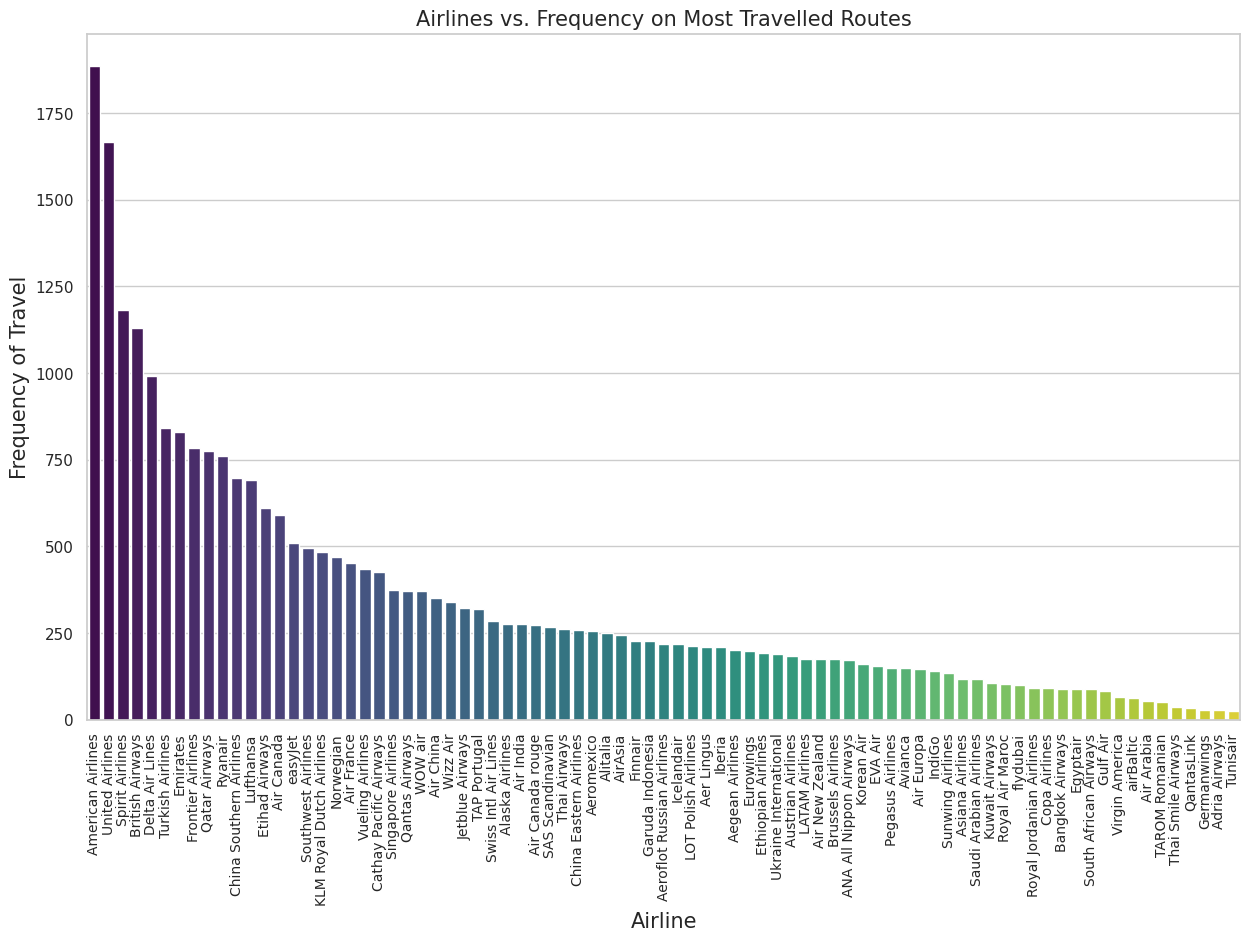

In [ ]:
# Chart - 12 visualization code

# Count the number of unique routes traveled by each airline
airline_route_counts = airline_df.groupby('airline')['route'].nunique().reset_index()

# Sort the airlines by the number of routes in descending order
airline_route_counts = airline_route_counts.sort_values(by='route', ascending=False)

# Set the figure size
plt.figure(figsize=(13, 8))

# Create a count plot for airlines and the number of routes traveled
sns.barplot(x='airline', y='route', data=airline_route_counts, palette='viridis')

plt.xlabel('Airline',fontsize=15)
plt.ylabel('Frequency of Travel',fontsize=15)
plt.title('Airlines vs. Frequency on Most Travelled Routes',fontsize=15)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=90,fontsize=10)
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:-** Bar charts are well-suited for visualizing nominal or categorical data, where categories have no inherent order. The chart effectively conveys the frequency or count of unique routes traveled by each airline.

##### 2. What is/are the insight(s) found from the chart?

**Ans:-** The chart presents a clear picture of which airlines traveled the most times on the most popular route. American Airlines, United Airlines, Spirit Airlines, British Airways, etc. are the most demanded airlines among passengers, while Tunis Air,Kuwait Airways, Air Arabia, and FlyDubai, etc. are among the least demanded aircraft to travel on their favorite routes.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** The analysis of the number of unique routes traveled by each airline can have both positive and potentially negative impacts on an airline's business. Let's explore how these insights can influence business outcomes:

**Positive Business Impact:**

* **Market Expansion**: Airlines with a diverse range of unique routes have the potential to attract a broader customer base. By expanding their route networks strategically, they can tap into new markets and increase revenue.

* **Competitive Advantage**: Airlines with a comprehensive route network can position themselves as industry leaders, offering passengers a wide choice of destinations. This competitive advantage can lead to increased market share and profitability.

**Potential Negative Business Impact:**

* **Resource Constraints**: Managing a large number of routes can strain an airline's resources, including aircraft, crews, and ground services. This could lead to operational challenges and increased costs.

* **Competition**: Airlines with extensive route networks may face heightened competition, especially on high-traffic routes. This could result in fare wars and reduced profit margins.

#### Chart - 13- Change in overall review over succeeding year for top 12 airlines

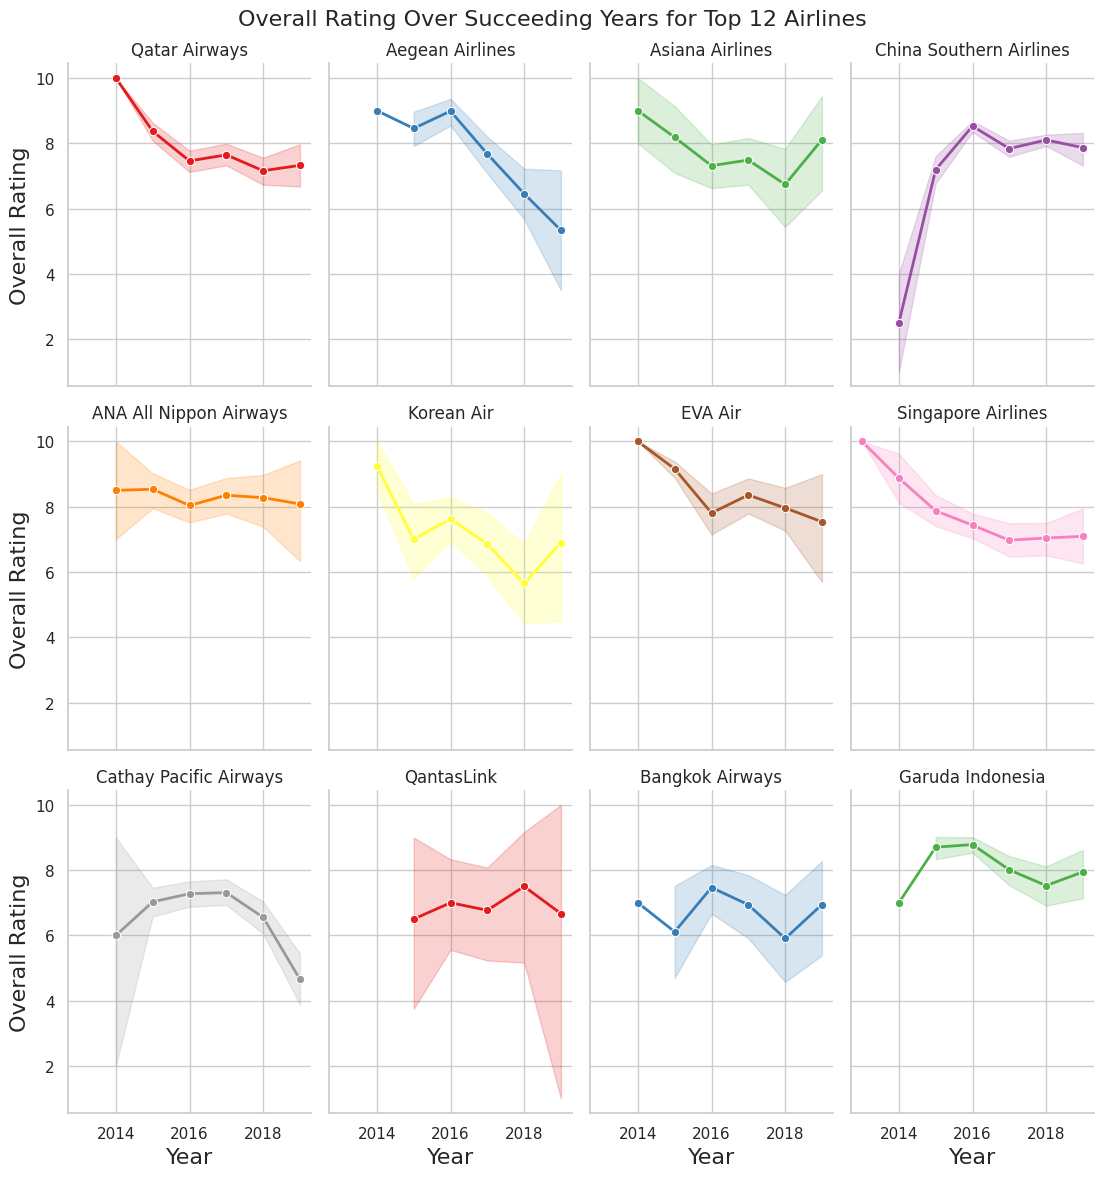

In [ ]:
# Chart - 13 visualization code
# Calculate the average overall rating for each airline
average_overall_rating = airline_df.groupby('airline')['overall'].mean().reset_index()

# Sort by average overall rating and select the top 12 airlines
top_12_airlines = average_overall_rating.nlargest(12, 'overall')['airline']

# Filter the DataFrame to include only data for the top 12 airlines
filtered_df = airline_df[airline_df['airline'].isin(top_12_airlines)]

# Create a FacetGrid with subplots for each airline
g = sns.FacetGrid(filtered_df, col='airline', col_wrap=4, height=4, aspect=0.7, hue='airline', palette='Set1')
g.map(sns.lineplot, 'year', 'overall', marker='o', lw=2)

# Set axis labels and titles
g.set_axis_labels('Year', 'Overall Rating', fontsize=16)
g.set_titles(col_template='{col_name}')

# Adjust subplot spacing and add a title at the top
plt.subplots_adjust(top=0.85)
plt.suptitle('Overall Rating Over Succeeding Years for Top 12 Airlines', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

**Ans:**  Line plots are well-suited for time-series data, which involves tracking data points over successive time periods. This makes it suitable for analyzing how overall rating changes over time.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** The chart aids in competitive analysis by showing how each airline's overall rating compares to its peers.
> Airlines with consistently high ratings may have a competitive advantage. For example "China Southern Airlines" & "Garuda Airlines".

> Sudden drops or spikes in overall ratings may indicate shifts in customer sentiment.For example "Aegean Airlines".



##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** The line plots showing how the overall rating changes for the top 12 airlines over succeeding years can indeed help create a positive business impact for airlines and the travel industry. However, they can also potentially lead to negative growth if not acted upon effectively.

**Positive Business Impact**:

> **Identifying Improvement Areas**: Insights that highlight consistent upward trends in overall ratings can help airlines identify areas where they are excelling. They can leverage these strengths in marketing efforts to attract more customers who prioritize those aspects.


**Potential Negative Growth**:

> **Ignoring Negative Trends**: Failing to address consistent negative trends in overall ratings can lead to a decline in customer satisfaction and negative growth. If airlines do not respond to customer feedback and complaints, they risk losing customers to competitors.

> **Competitive Disadvantage**: Airlines with consistently low ratings may find it challenging to compete in the market. Negative feedback can deter potential customers, leading to decreased market share.

#### Chart - 14 - Correlation Heatmap

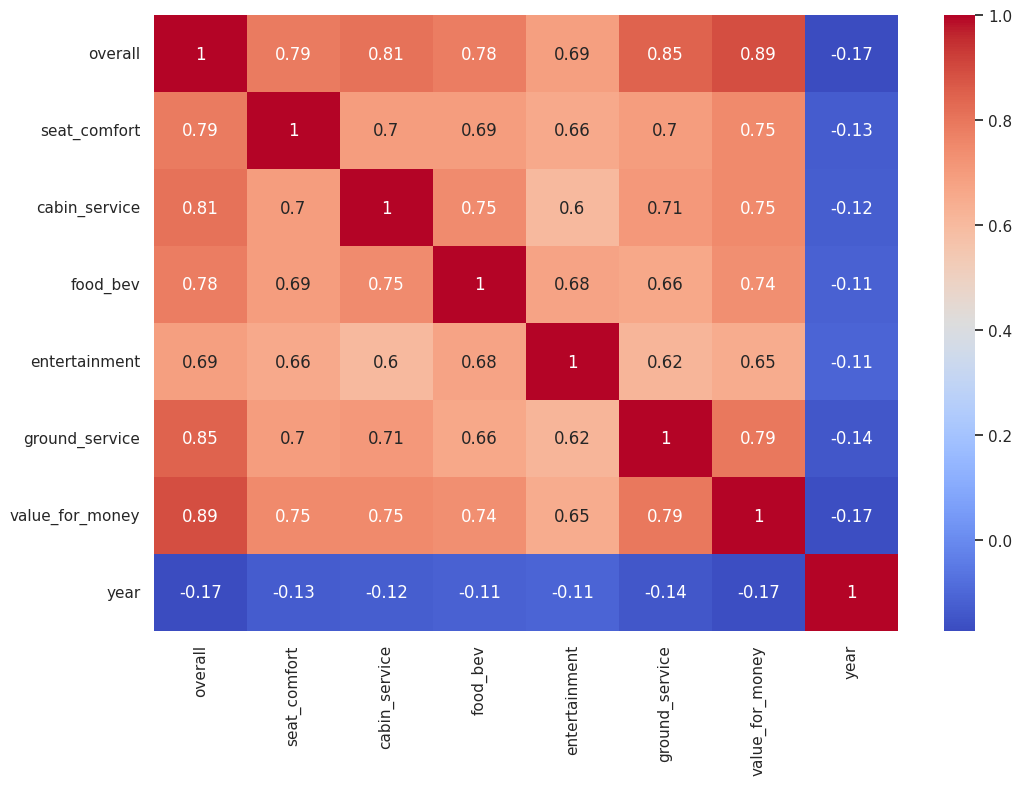

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,8))
sns.heatmap(airline_df.corr(), annot=True,cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:-** Heatmaps are particularly effective for visualizing correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** From the heatmap it is clearly visible that all the independent variables are strongly correlated with each other. Hence, during further data preprocessing we need to take care of multicollinearity.

#### Chart - 15 - Pair Plot

<Figure size 800x400 with 0 Axes>

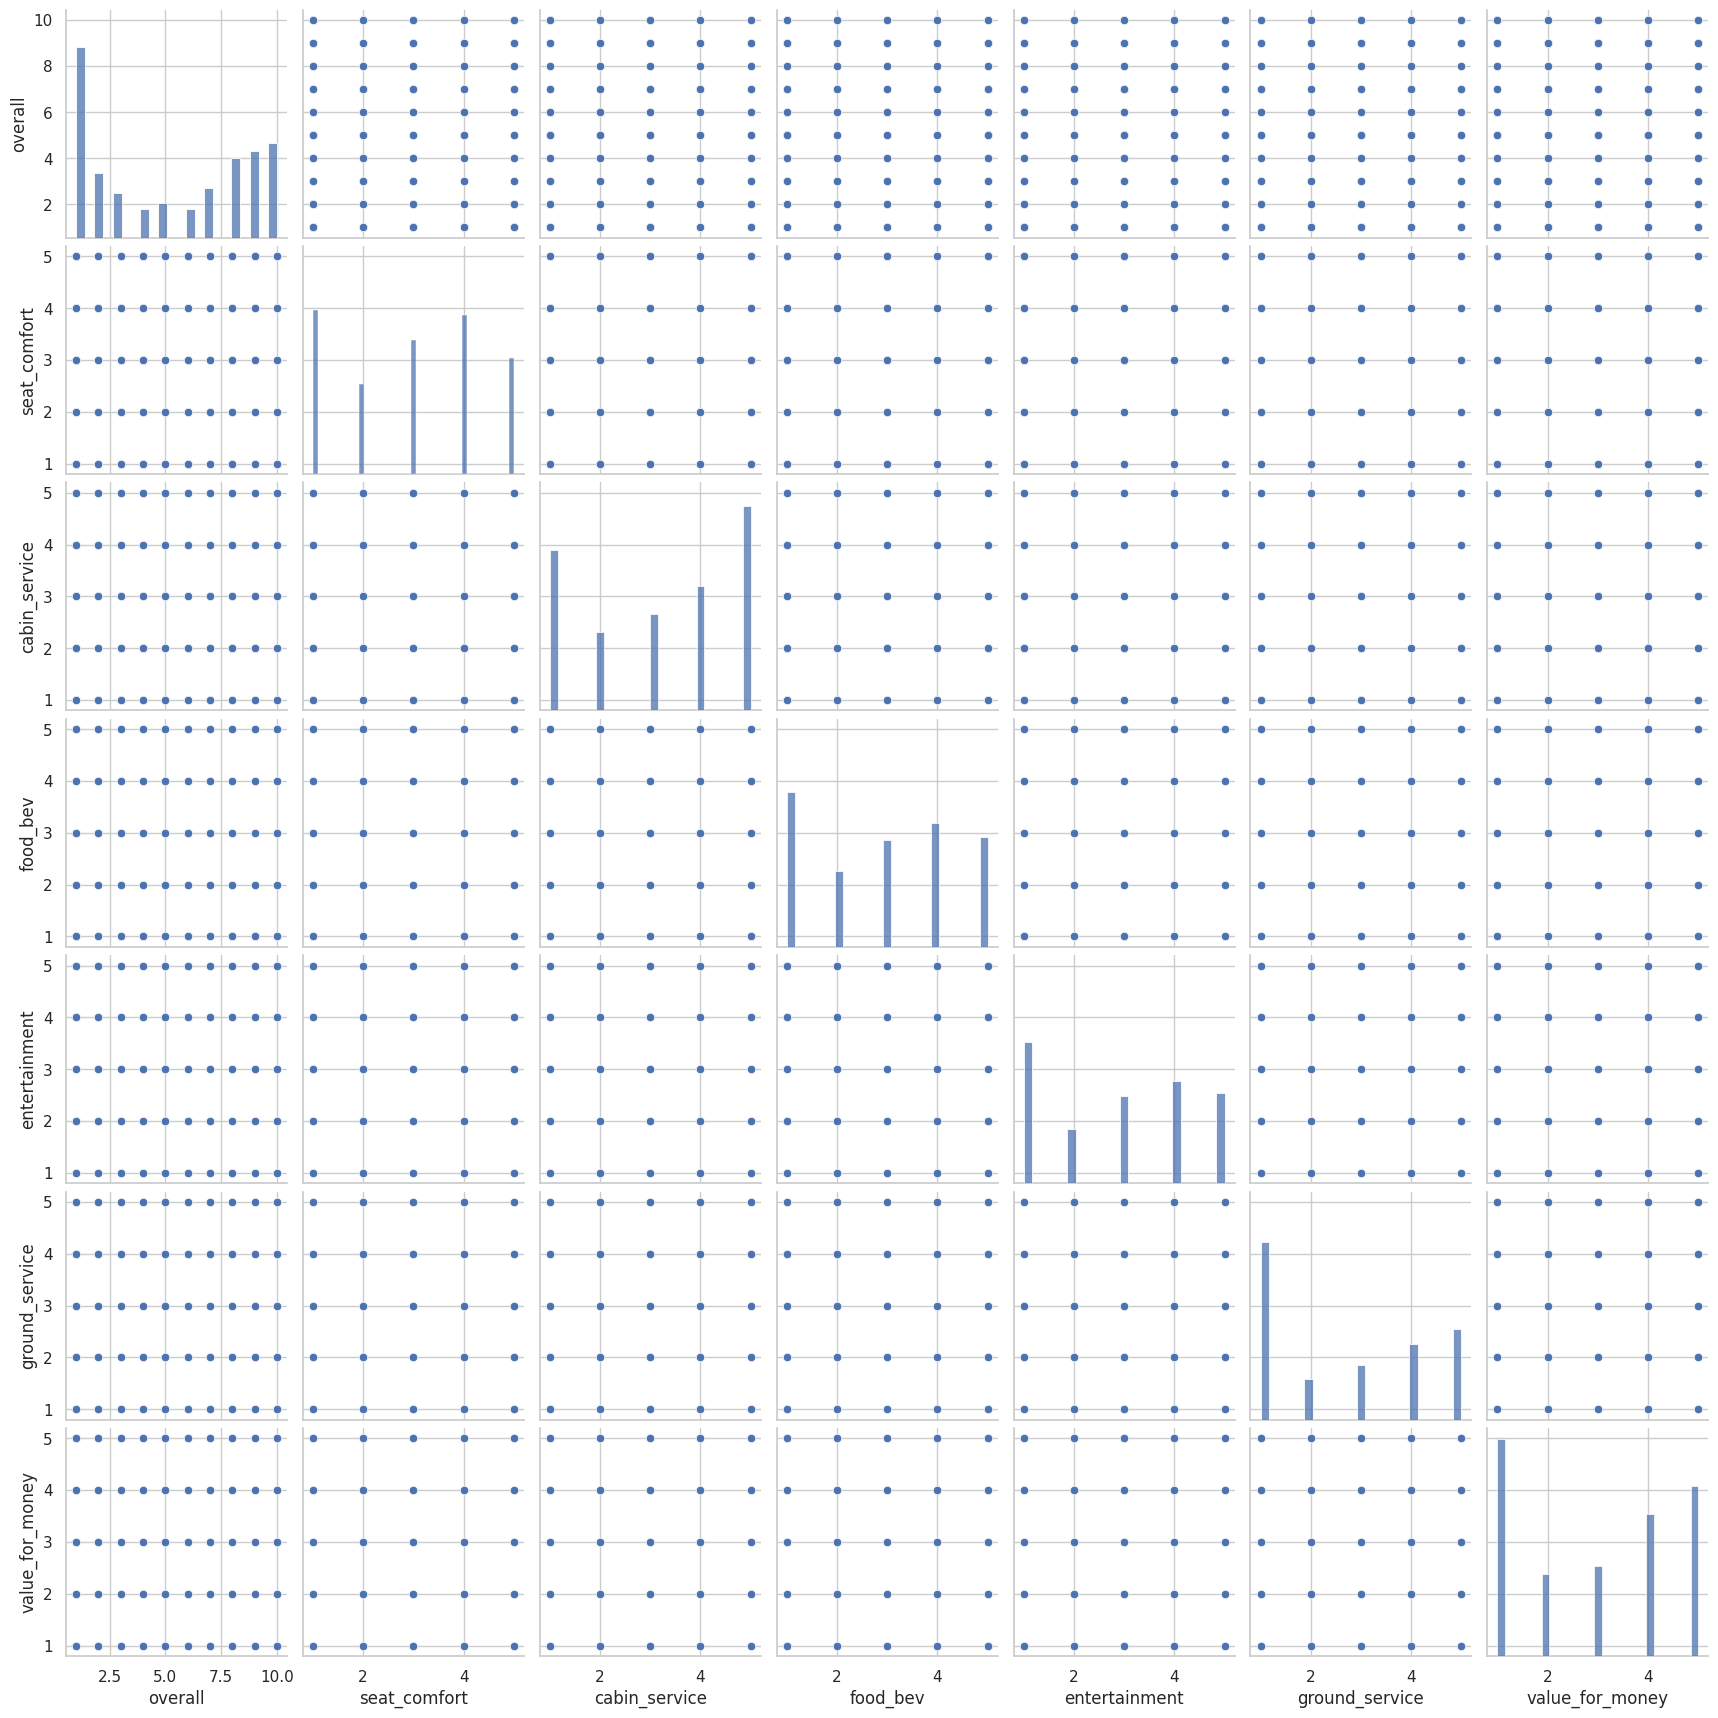

In [ ]:
# 15 Pair Plot visualization code
columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']
plt.figure(figsize=(8,4))
# Create a pairplot
sns.pairplot(airline_df[columns])
plt.show()


##### 1. Why did you pick the specific chart?

**Ans:-** Pairplots allow us to visualize multivariate relationships in a dataset. It help us to identify patterns, trends, and relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

**Ans:-**Since all the variables are discrete in nature, it is not possible to reach any conclusion without further data analysis.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: "Airline passengers who rate seat comfort higher are more likely to recommend the airline."

Hypothesis 2: "Reviews posted in recent years are more critical of airline services compared to reviews from earlier years."

Hypothesis 3: "Passengers who travel for business purposes rate cabin service higher than those traveling for leisure."

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant correlation between seat comfort ratings and the likelihood of recommending the airline.

**Alternative Hypothesis (H1):** There is a significant correlation between seat comfort ratings and the likelihood of recommending the airline.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Dropping the Null Value from the "recommended" & "seat_comfort" column
recommended=airline_df['recommended'].dropna()
seat_comfort=airline_df['seat_comfort'].dropna()

# Convert the data in 'recommended' columns to numeric
recommended=recommended.replace({'yes': 1, 'no': 0})

# Picking out 100 Random Samples to perform t-test
sample_recommended=recommended.sample(100,random_state=42)
sample_seat_comfort=seat_comfort.sample(100,random_state=42)

# Perform t-test
t_statistic, p_value = stats.ttest_ind(sample_seat_comfort, sample_recommended)

# Set the significance level (alpha)
alpha = 0.05

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Compare p-value with alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in seat comfort ratings.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in seat comfort ratings.")

t-statistic: 16.68170252432654
p-value: 1.3482544119270983e-39
Reject the null hypothesis. There is a significant difference in seat comfort ratings.


##### Which statistical test have you done to obtain P-Value?

**Ans:** T-test are performed to find P-value

##### Why did you choose the specific statistical test?

**Ans:** T-test is commonly used to compare the means of two samples or groups to assess whether the observed difference is statistically significant or if it could have occurred by chance.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in the average overall ratings of airline reviews posted in recent years compared to reviews from earlier years.

**Alternative Hypothesis (H1)**: Reviews posted in recent years have significantly lower average overall ratings compared to reviews from earlier years.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Define a threshold year to distinguish recent and earlier years
threshold_year = 2019

# Split the data into two groups: recent and earlier years
recent_years = airline_df[airline_df['year'] >= threshold_year]['overall']
earlier_years = airline_df[airline_df['year'] < threshold_year]['overall']

# Dropping the null value
recent_years=recent_years.dropna()
earlier_years=earlier_years.dropna()

# Picking 100 random samples to perform t-test
random_recent_years=recent_years.sample(100,random_state=42)
random_earlier_years=earlier_years.sample(100,random_state=42)

# Perform a t-test to compare the average overall ratings
t_statistic, p_value = stats.ttest_ind(random_recent_years, random_earlier_years)

# Set the significance level (alpha)
alpha = 0.05

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Compare p-value with alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. Reviews from recent years are more critical of airline services compared to reviews from earlier years.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in review ratings between recent and earlier years.")


t-statistic: -1.2621781197880695
p-value: 0.20836937699784344
Fail to reject the null hypothesis. There is no significant difference in review ratings between recent and earlier years.


##### Which statistical test have you done to obtain P-Value?

**Ans:** T-test are performed to find P-value.

##### Why did you choose the specific statistical test?

**Ans:** T-test is commonly used to compare the means of two samples or groups to assess whether the observed difference is statistically significant or if it could have occurred by chance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in the average cabin service ratings between passengers who travel for business purposes and those who travel for leisure.

**Alternative Hypothesis (H1):** Passengers who travel for business purposes rate cabin service significantly higher than passengers who travel for leisure.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Convert 'traveller_type' column to lowercase for consistency
airline_df['traveller_type'] = airline_df['traveller_type'].str.lower()

# Define the two groups: business travelers and leisure travelers
business_travelers = airline_df[airline_df['traveller_type'] == 'business']['cabin_service']
leisure_travelers = airline_df[airline_df['traveller_type'] !='business']['cabin_service']

# Dropping the Null Value from
business_travelers=business_travelers.dropna()
leisure_travelers=leisure_travelers.dropna()

# Picking 100 random samples to perform t-test
sample_business_travelers=business_travelers.sample(100,random_state=42)
sample_couple_travelers=leisure_travelers.sample(100,random_state=42)

# Perform a t-test to compare the average cabin service ratings
t_statistic, p_value = stats.ttest_ind(sample_business_travelers, sample_couple_travelers)

# Set the significance level (alpha)
alpha = 0.05

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Compare p-value with alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. Business travelers rate cabin service higher than leisure travelers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in cabin service ratings between business and leisure travelers.")


t-statistic: -0.699662892383371
p-value: 0.4849590309668781
Fail to reject the null hypothesis. There is no significant difference in cabin service ratings between business and leisure travelers.


##### Which statistical test have you done to obtain P-Value?

**Ans:** T-test are performed to find P-value

##### Why did you choose the specific statistical test?

**Ans:** T-test is commonly used to compare the means of two samples or groups to assess whether the observed difference is statistically significant or if it could have occurred by chance.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Making copy of original dataframe
df=airline_df.copy()

In [ ]:
# Columns to Keep

df=airline_df[['overall','traveller_type', 'cabin','seat_comfort','cabin_service', 'food_bev',
               'entertainment', 'ground_service','value_for_money', 'recommended']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61184 entries, 0 to 131894
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          59401 non-null  float64
 1   traveller_type   37540 non-null  object 
 2   cabin            58705 non-null  object 
 3   seat_comfort     56211 non-null  float64
 4   cabin_service    56240 non-null  float64
 5   food_bev         48341 non-null  float64
 6   entertainment    40230 non-null  float64
 7   ground_service   37169 non-null  float64
 8   value_for_money  59327 non-null  float64
 9   recommended      59761 non-null  object 
dtypes: float64(7), object(3)
memory usage: 5.1+ MB


In [ ]:
df.isnull().sum()

overall             1783
traveller_type     23644
cabin               2479
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [ ]:
# Handling Missing Values

# Imputing numerical column with mean using Sklearn Simple Imputer method
from sklearn.impute import SimpleImputer

# Columns to impute
numeric_column=['overall', 'seat_comfort', 'cabin_service','food_bev', 'entertainment', 'ground_service', 'value_for_money']
categorical_column=['traveller_type', 'cabin']

# Create instance of Simple Imputer with mean strategy
numeric_imputer=SimpleImputer(strategy='mean')
categorical_imputer=SimpleImputer(strategy='most_frequent')

# Fitting the imputer method
df[numeric_column]=numeric_imputer.fit_transform(df[numeric_column])
df[categorical_column]=categorical_imputer.fit_transform(df[categorical_column])

# Applying dropna() method on target variable
df.dropna(subset='recommended',inplace=True)

In [ ]:
df.isnull().sum()

overall            0
traveller_type     0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

In [ ]:
df.shape

(59761, 10)

In [ ]:
# Checking Duplicated Row
df.duplicated().sum()

31419

In [ ]:
# Dropping Duplicated Row
df.drop_duplicates(inplace=True)

# Again Checking Duplicated Row
df.duplicated().sum()

0

In [ ]:
df.shape

(28342, 10)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Mean imputation technique is used on numerical columns while mode imputation technique is used on categorical columns.

* **Mean imputation** is appropriate when we want to maintain the central tendency of the data.

* **Mode imputation** is suitable for categorical data as it preserves the most common category.


The Target column("recommended") is imputed using dropna technique because using mode imputation on target column will lead to Class Imbalance.

### 2. Handling Outliers

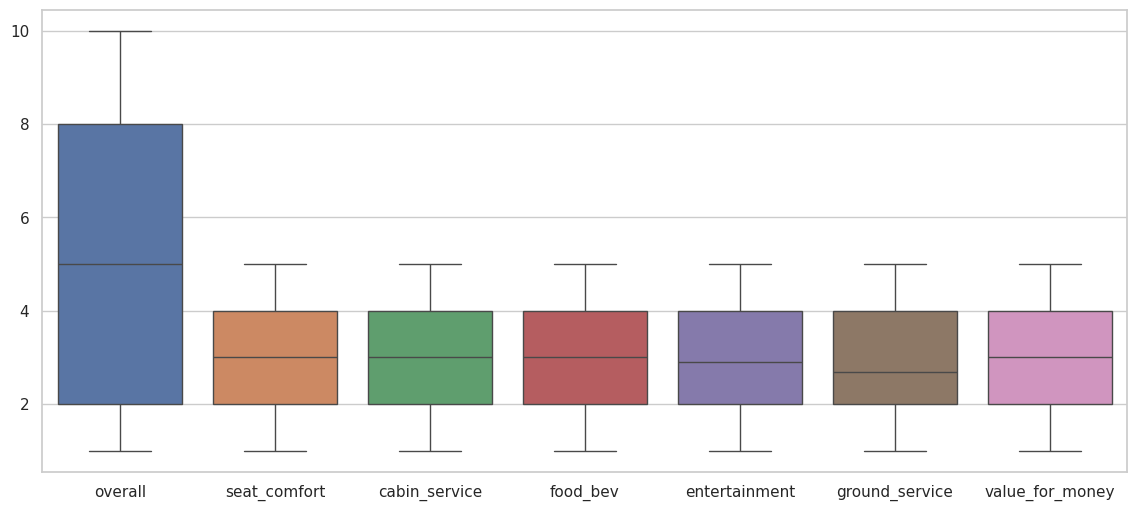

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(14,6))
sns.boxplot(df)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Ans:** There is no need to address outliers because there are no outliers in the independent variables.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Binary Encoding Target Variable
df['recommended']=df['recommended'].replace({'yes': 1, 'no': 0})

# Applying Ordinal Encoding to cabin column
df['cabin']=df['cabin'].replace({'Economy Class':0, 'Premium Economy':1, 'Business Class' : 2,'First Class':3})

# Applying One Hot Encoding to Traveller_Type column
ohe=pd.get_dummies(df['traveller_type'],drop_first=True)

# Concatenating the encoded feature with original dataframe
df=pd.concat([df,ohe],axis=1)

# Dropping traveller_type column from the dataframe
df=df.drop('traveller_type',axis=1)

In [ ]:
df.head()

,overall,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,couple leisure,family leisure,solo leisure
1,7.0,0,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,0
3,2.0,0,4.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0
5,3.0,0,1.0,4.0,1.0,3.0,1.0,2.0,0,0,0,0
7,10.0,0,4.0,5.0,5.0,5.0,5.0,5.0,1,0,0,1
9,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

* **Binary Encoding for Target Variable:**-This is often done when we have a binary classification problem, where you want to predict one of two classes.This code is converting the 'recommended' column with values 'yes' and 'no,' into numerical values 'yes' is being encoded as 1, and 'no' as 0.

* **Ordinal Encoding for 'cabin' Column:**-Ordinal encoding is suitable when there is an inherent order or ranking among the categories. Different cabin classes ('Economy Class,' 'Premium Economy,' 'Business Class,' 'First Class') are being mapped to integer values (0, 1, 2, 3).

* **One-Hot Encoding for 'traveller_type' Column:**- One-hot encoding is suitable for the those categorical column with no intrinsic order. One-hot encoding creates binary (0 or 1) columns for each category, indicating whether each instance belongs to that category or not. The `drop_first=True` argument is specified to drop one of the one-hot-encoded columns to prevent multicollinearity.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Checking Multicollinearity

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]
    return vif

# Select columns for which VIF is calculated
selected_columns = [col for col in df.describe().columns if col not in ['recommended']]

# Selecting the columns from DataFrame
selected_data = df[selected_columns]

# Calculate VIF for the selected columns
vif_result = calculate_vif(selected_data)

# Sort the VIF result DataFrame by VIF in descending order
vif_result_sorted = vif_result.sort_values(by='VIF', ascending=False)

print(vif_result_sorted)

           Features    VIF
7   value_for_money  14.50
0           overall  12.65
3     cabin_service  10.91
2      seat_comfort  10.32
4          food_bev   9.86
6    ground_service   8.66
5     entertainment   7.94
10     solo leisure   3.49
8    couple leisure   1.85
9    family leisure   1.64
1             cabin   1.47


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# Identify columns with high VIF
high_vif_cols = vif_result[vif_result['VIF'] > 12]['Features']

# Remove columns with high VIF
df.drop(high_vif_cols, axis=1, inplace=True)
df.head()

,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,recommended,couple leisure,family leisure,solo leisure
1,0,4.0,5.0,4.0,4.0,2.0,1,0,0,0
3,0,4.0,1.0,1.0,1.0,1.0,0,0,1,0
5,0,1.0,4.0,1.0,3.0,1.0,0,0,0,0
7,0,4.0,5.0,5.0,5.0,5.0,1,0,0,1
9,0,1.0,1.0,1.0,1.0,1.0,0,0,0,1


##### What all feature selection methods have you used  and why?

**Ans:** Variance Inflation Factor method is used for feature selection.

VIF is used to identify and potentially remove features that contribute to multicollinearity. The idea is to retain a subset of features that are relatively independent of each other, reducing the negative effects of multicollinearity.

High VIF values suggest that a feature can be predicted using the other features, and therefore it might be redundant in the presence of other correlated features.

##### Which all features you found important and why?

**Ans:** In a multivariate regression model, multicollinearity exists when there is a correlation betweem many independent variables. Under ideal conditions, small VIF value suggest low correlation accross variables. Hence keeping the threshold limit of 12, all the variables with VIF< 12 is included in the model.



### 6. Data Transformation

In [ ]:
df.skew()

cabin             1.181600
seat_comfort     -0.122839
cabin_service    -0.306671
food_bev          0.040224
entertainment     0.004541
ground_service    0.157906
recommended       0.145618
couple leisure    1.639311
family leisure    2.209100
solo leisure     -0.152877
dtype: float64

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No Need to Transform the data as the data is almost symmetrical in nature. The skewness which is shown in "Cabin","couple leisure" & "family leisure" becuase they are encoded data.

###7. Data Scaling

In [ ]:
# Scaling your data

# Normalizing data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_df = pd.DataFrame(sc.fit_transform(df))
scaled_df.columns = df.columns

In [ ]:
scaled_df.head()

,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,recommended,couple leisure,family leisure,solo leisure
0,0.0,0.75,1.00,0.75,0.75,0.25,1.0,0.0,0.0,0.0
1,0.0,0.75,0.00,0.00,0.00,0.00,0.0,0.0,1.0,0.0
2,0.0,0.00,0.75,0.00,0.50,0.00,0.0,0.0,0.0,0.0
3,0.0,0.75,1.00,1.00,1.00,1.00,1.0,0.0,0.0,1.0
4,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0


##### Which method have you used to scale you data and why?

**Ans:** MinMax scaling is used to scale the data.

During the outlier removal step, some of the outliers remain with the data, and hence, to reduce the effect of outliers, MinMax scaling is the best scaling technique. It compressed the whole data into the range of 0 to 1.

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**Ans:** Dimensionality reduction techniques can lead to information loss. Since we have only 10 features in our dataset, the risk of overfitting is reduced because the model has fewer opportunities to fit noise in the data. Hence no need to apply dimensionality reduction techniques such as PCA.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=scaled_df.drop('recommended',axis=1)
y=scaled_df['recommended']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(22673, 9)
(5669, 9)


##### What data splitting ratio have you used and why?

**Ans:-**Data is split in the ratio of 80:20 which means 80% of the data is used for training purpose & remaining 20% data is used for testing purpose.

The choice of the train-test split ratio, such as 0.8 (80%) for training and 0.2 (20%) for testing, is not a strict rule, but rather a commonly used practice in machine learning and data analysis. This ratio is often chosen due to a balance between ensuring sufficient data for training a model while also having a sizable portion for evaluating its performance on unseen data.

### 10. Handling Imbalanced Dataset

In [ ]:
# Handling Imbalanced Dataset (If needed)
df['recommended'].value_counts()

0    15200
1    13142
Name: recommended, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

**Ans:-** The dataset is not imbalanced & hence no need to balance it.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 (Logistic Regression)



In [ ]:
# ML Model - 1 Implementation

# Applying Logistic Regression
model_lr=LogisticRegression(fit_intercept=True, max_iter=1000)

# Fit the Algorithm
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on the model
train_class_preds = model_lr.predict(X_train)
test_class_preds = model_lr.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8425439950602037
The accuracy on test data is  0.8493561474686894


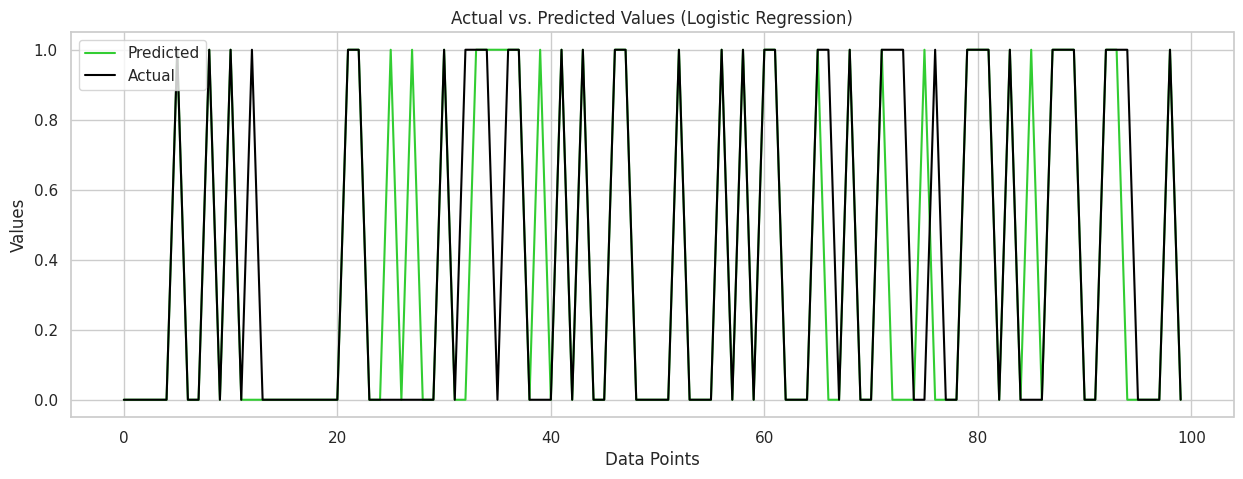

In [ ]:
# Visualizing actual vs predicted value
plt.figure(figsize=(15, 5))

# Plotting the predicted values for the specific range
plt.plot(test_class_preds[100:200], label="Predicted", color='limegreen')

# Plotting the actual values for the specific range
plt.plot(np.array(y_test[100:200]), label="Actual", color='black')

plt.legend(loc='upper left')
plt.title("Actual vs. Predicted Values (Logistic Regression)")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.show()


[]

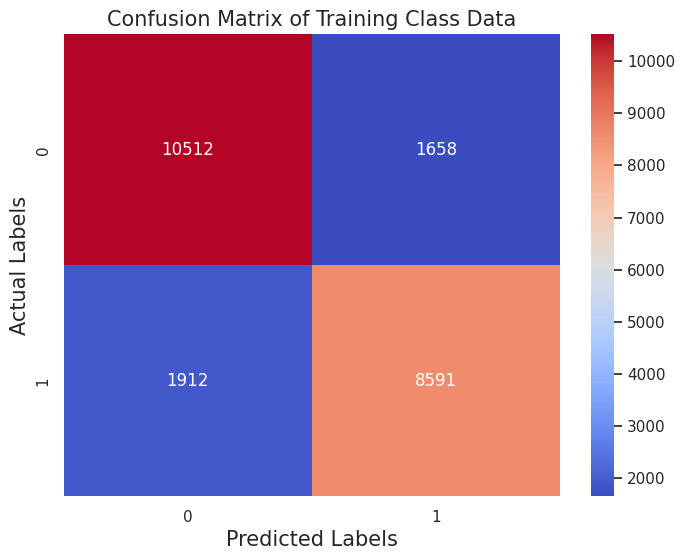

In [ ]:
# Plot the confusion matrix of Training Class

plt.figure(figsize=(8,6))
confuse_matrix_train_lr = confusion_matrix(y_train,train_class_preds)

ax= plt.subplot()
sns.heatmap(confuse_matrix_train_lr, annot=True, fmt = 'd',ax = ax,cmap='coolwarm')
ax.set_xlabel('Predicted Labels',fontsize=15)
ax.set_ylabel('Actual Labels',fontsize=15)
ax.set_title('Confusion Matrix of Training Class Data',fontsize=15)
plt.plot()

[]

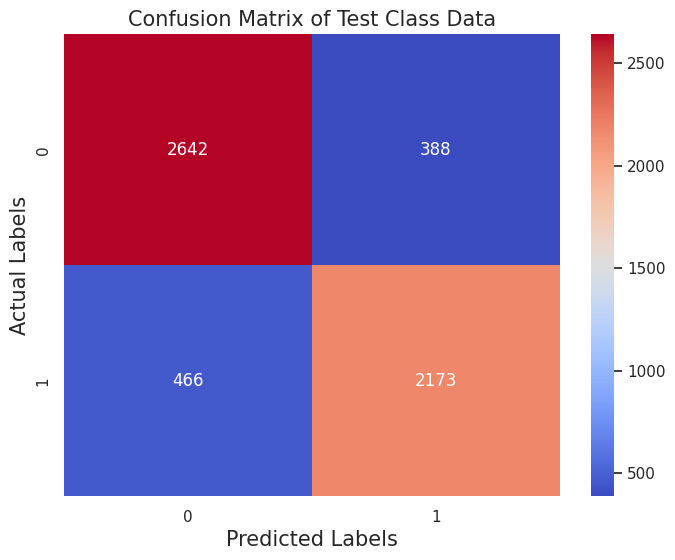

In [ ]:
# Plot the confusion matrix of Test Class

plt.figure(figsize=(8,6))
confuse_matrix_test_lr = confusion_matrix(y_test,test_class_preds)

ax= plt.subplot()
sns.heatmap(confuse_matrix_test_lr, annot=True, fmt = 'd',ax = ax,cmap='coolwarm')
ax.set_xlabel('Predicted Labels',fontsize=15)
ax.set_ylabel('Actual Labels',fontsize=15)
ax.set_title('Confusion Matrix of Test Class Data',fontsize=15)
plt.plot()

In [ ]:
# Visualizing evaluation Metric Score chart
print("Training Data")
print(classification_report(y_train, train_class_preds))
print("\n")
print("Testing Data")
print(classification_report(y_test, test_class_preds))

Training Data
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85     12170
         1.0       0.84      0.82      0.83     10503

    accuracy                           0.84     22673
   macro avg       0.84      0.84      0.84     22673
weighted avg       0.84      0.84      0.84     22673



Testing Data
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      3030
         1.0       0.85      0.82      0.84      2639

    accuracy                           0.85      5669
   macro avg       0.85      0.85      0.85      5669
weighted avg       0.85      0.85      0.85      5669



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic Regression is a statistical and machine learning technique used for binary and multiclass classification tasks. It's commonly used for binary classification problems, where the target variable has two possible outcomes, often denoted as 0 (negative class) and 1 (positive class).


Based on the above evaluation metric score chart, the Logistic Regression model demonstrates strong performance in both classifying instances as class 0 and class 1. It achieves a good balance between precision and recall for both classes and an overall accuracy of 85%, indicating its effectiveness in making accurate predictions for binary classification.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
logistic_param={'penalty': ['l1', 'l2', 'elasticnet', None],
                'C':[0.01,0.1,1,5,10],
                'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                'l1_ratio':[0,0.4,0.6,0.8,1]}

model_logistic=LogisticRegression()

# Fit the Algorithm
logistic_grid = GridSearchCV(model_logistic, logistic_param, cv=5, scoring='roc_auc')

# Predict on the model
logistic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10],
                         'l1_ratio': [0, 0.4, 0.6, 0.8, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='roc_auc')

In [ ]:
print(logistic_grid.best_params_)
print(logistic_grid.best_score_)

{'C': 0.1, 'l1_ratio': 0.6, 'penalty': 'elasticnet', 'solver': 'saga'}
0.9186808044423739


In [ ]:
# Predict on the model
train_lr_preds = logistic_grid.predict(X_train)
test_lr_preds = logistic_grid.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_lr_preds,y_train)
test_accuracy_lr = accuracy_score(test_lr_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.8421911524721034
The accuracy on test data is  0.8497089433762568


In [ ]:
# Applying Cross Validation on  Logistic Regression
scores=cross_val_score(model_logistic,X_train,y_train,cv=10,scoring='roc_auc')
cv_score=scores.mean()
print("Cross Validation Score is: ",cv_score)

Cross Validation Score is:  0.918779395114899


##### Which hyperparameter optimization technique have you used and why?

**Ans:** The GridSearchCV is used as hyperparameter optimisation. The reason is that it exhaustively explores a given hyperparameter space to identify the perfect hyperparameter that would produce the greatest model performance.

In [ ]:
# Visualizing evaluation Metric Score chart after Hyperparameter Tuning
print("Training Data")
print(classification_report(y_train, train_lr_preds))
print("\n")
print("Testing Data")
print(classification_report(y_test, test_lr_preds))

Training Data
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85     12170
         1.0       0.84      0.82      0.83     10503

    accuracy                           0.84     22673
   macro avg       0.84      0.84      0.84     22673
weighted avg       0.84      0.84      0.84     22673



Testing Data
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      3030
         1.0       0.85      0.82      0.84      2639

    accuracy                           0.85      5669
   macro avg       0.85      0.85      0.85      5669
weighted avg       0.85      0.85      0.85      5669



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Ans:-** As far as accuracy is concerned, there is no improvement after performing hyperparameter tuning, and it remains at 85%.

**Plotting ROC-AUC Curve For Logistic Regression**

In [ ]:
model_lr=LogisticRegression(C=0.1, l1_ratio=0.6, penalty='elasticnet', solver= 'saga')
model_lr.fit(X_train,y_train)

LogisticRegression(C=0.1, l1_ratio=0.6, penalty='elasticnet', solver='saga')

In [ ]:
y_pred_proba_lr=model_lr.predict_proba(X_test)[:,1]

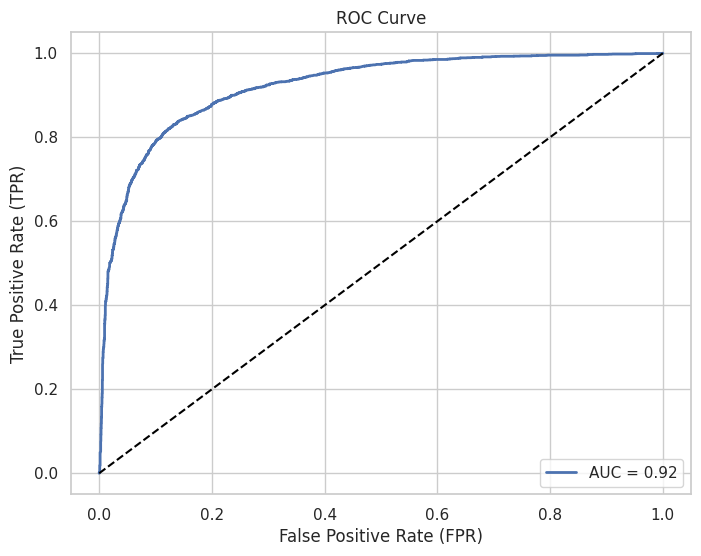

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### ML Model - 2 (Random Forest Classifier)

In [ ]:
# Random Forest Regressor
model_rf=RandomForestClassifier()

# fit the model
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Predict on the model
train_preds_rf = model_rf.predict(X_train)
test_preds_rf = model_rf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_rf_accuracy = accuracy_score(train_preds_rf,y_train)
test_rf_accuracy = accuracy_score(test_preds_rf,y_test)

print("The accuracy on train data is ", train_rf_accuracy)
print("The accuracy on test data is ", test_rf_accuracy)

The accuracy on train data is  0.9110395624751908
The accuracy on test data is  0.8209560769095079


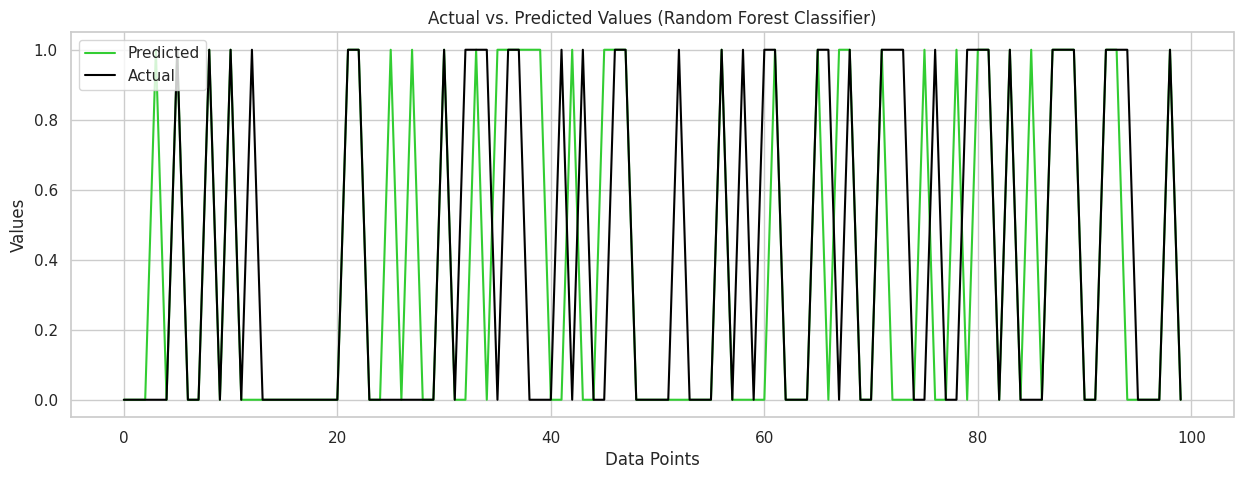

In [ ]:
# Visualizing actual vs predicted value

plt.figure(figsize=(15, 5))

# Plotting the predicted values for the specific range
plt.plot(test_preds_rf[100:200],label="Predicted",color='limegreen')


# Plotting the actual values for the specific range
plt.plot(np.array(y_test[100:200]),label="Actual",color='black')

plt.legend(loc='upper left')
plt.title("Actual vs. Predicted Values (Random Forest Classifier)")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.show()


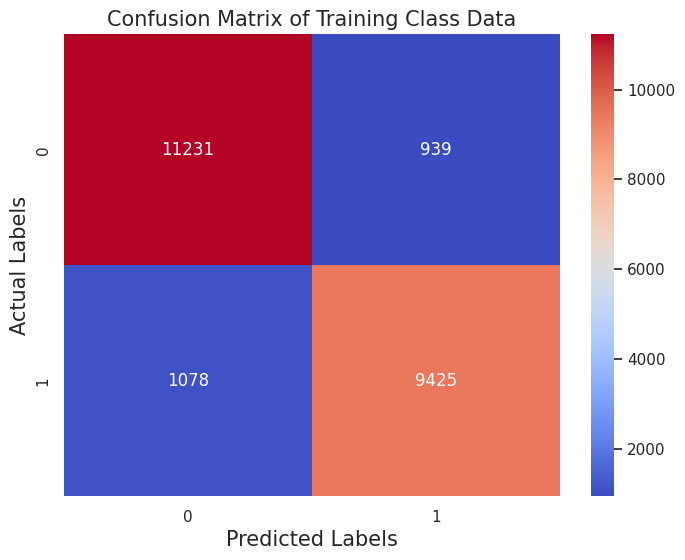

In [ ]:
# Plot the confusion matrix of Training Class
plt.figure(figsize=(8,6))
confuse_matrix_train_rf = confusion_matrix(y_train,train_preds_rf)

ax= plt.subplot()
sns.heatmap(confuse_matrix_train_rf, annot=True, fmt = 'd', ax = ax, cmap='coolwarm')  # Added 'cmap' parameter
ax.set_xlabel('Predicted Labels',fontsize=15)
ax.set_ylabel('Actual Labels',fontsize=15)
ax.set_title('Confusion Matrix of Training Class Data',fontsize=15)
plt.show()  # Changed from plt.plot() to plt.show()


[]

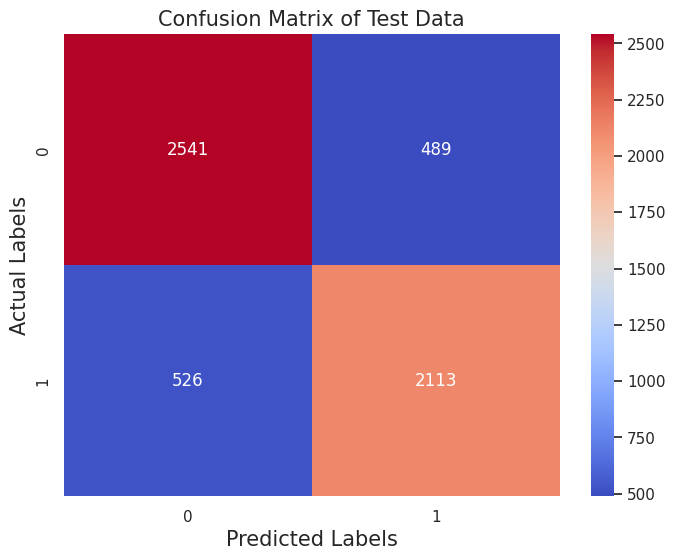

In [ ]:
# Plot the confusion matrix of Testing Class

plt.figure(figsize=(8,6))
confuse_matrix_test_rf = confusion_matrix(y_test,test_preds_rf)

ax= plt.subplot()
sns.heatmap(confuse_matrix_test_rf, annot=True, fmt = 'd',ax = ax,cmap='coolwarm')
ax.set_xlabel('Predicted Labels',fontsize=15)
ax.set_ylabel('Actual Labels',fontsize=15)
ax.set_title('Confusion Matrix of Test Data',fontsize=15)
plt.plot()

In [ ]:
# Visualizing evaluation Metric Score chart

print("Training Data")
print(classification_report(y_train, train_preds_rf))
print("\n")
print("Testing Data")
print(classification_report(y_test, test_preds_rf))

Training Data
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92     12170
         1.0       0.91      0.90      0.90     10503

    accuracy                           0.91     22673
   macro avg       0.91      0.91      0.91     22673
weighted avg       0.91      0.91      0.91     22673



Testing Data
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83      3030
         1.0       0.81      0.80      0.81      2639

    accuracy                           0.82      5669
   macro avg       0.82      0.82      0.82      5669
weighted avg       0.82      0.82      0.82      5669



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Random Forest Classifier is an ensemble learning algorithm that combines multiple decision trees to make more accurate predictions. In a
Random Forest, a random subset of the training data and a random subset of the input features are used to train each decision tree. This randomness helps reduce overfitting and increases the model's generalization ability. During classification, the algorithm aggregates the predictions of the individual trees and typically selects the majority class as the final prediction.


From the evaluation metric score chart, we can clearly observe that the accuracy score has decreased to 82% from 85% calculated through the logistic regression model. However the Random Forest Model did good on training data (91%) compared to Logistic Regression Model (84%).


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
max_features = [0.2,0.6,1.0]
max_depth = [2,8,None]
max_samples = [0.5,0.75,1.0]


param_grid = {'max_features': max_features,
              'max_depth': max_depth,
            'max_samples':max_samples}
# Fit the Algorithm
model_rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = model_rf,
                       param_grid = param_grid,
                       cv = 3,
                       verbose=2,
                       n_jobs = -1)
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0]},
             verbose=2)

In [ ]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'max_depth': 8, 'max_features': 0.6, 'max_samples': 0.5}
0.8448375043503719


In [ ]:
# Predict on the model
train_tuned_rf_preds = rf_grid.predict(X_train)
test_tuned_rf_preds = rf_grid.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_tuned_rf = accuracy_score(train_tuned_rf_preds,y_train)
test_accuracy_tuned_rf = accuracy_score(test_tuned_rf_preds,y_test)

print("The accuracy on train data is ", train_accuracy_tuned_rf)
print("The accuracy on test data is ", test_accuracy_tuned_rf)

The accuracy on train data is  0.8573633837604199
The accuracy on test data is  0.8500617392838243


In [ ]:
# Applying Cross Validation on Random Forest Model
scores=cross_val_score(model_rf,X_train,y_train,cv=10,scoring='roc_auc')
cv_score=scores.mean()
print("Cross Validation Score is: ",cv_score)

Cross Validation Score is:  0.89273798330755


##### Which hyperparameter optimization technique have you used and why?

**Ans:** The GridSearchCV is used as hyperparameter optimisation. The reason is that it exhaustively explores a given hyperparameter space to identify the perfect hyperparameter that would produce the greatest model performance.

In [ ]:
# Visualizing evaluation Metric Score chart after Hyperparameter Tuning
print("Training Data")
print(classification_report(y_train, train_tuned_rf_preds))
print("\n")
print("Testing Data")
print(classification_report(y_test, test_tuned_rf_preds))

Training Data
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     12170
         1.0       0.85      0.84      0.84     10503

    accuracy                           0.86     22673
   macro avg       0.86      0.86      0.86     22673
weighted avg       0.86      0.86      0.86     22673



Testing Data
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      3030
         1.0       0.85      0.83      0.84      2639

    accuracy                           0.85      5669
   macro avg       0.85      0.85      0.85      5669
weighted avg       0.85      0.85      0.85      5669



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Ans:**- There is slight increase in the testing accuracy after hyperparameter tuning. The accuracy score which was 82% without hyperparameter tuning increased to 85% after hyperparameter tuning.

However one thing to note here is that the training accuracy which was 91% without tuning has decreased to 85%.

**Plot ROC-AUC Curve For Random Forest Model**

In [ ]:
model_rf=RandomForestClassifier(max_depth= 8,max_samples= 0.5,random_state=42)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_samples=0.5, random_state=42)

In [ ]:
# Predict probabilities on the test set
y_pred_proba_rf=model_rf.predict_proba(X_test)[:,1]

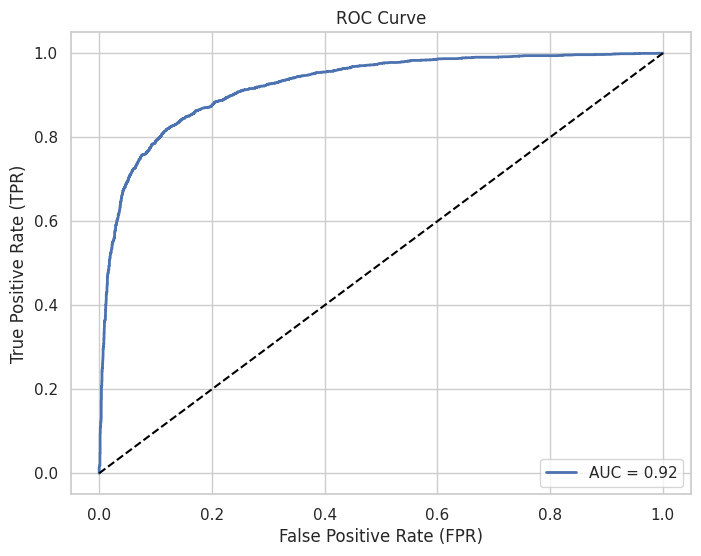

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

#Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

**Ans:** Each evaluation metric in a machine learning model provides valuable insights into the model's performance, and these insights can have specific implications for businesses. Let's discuss each metric's indication and its potential business impact:

> a) **Precision**:
   - **Indication**: Precision measures the accuracy of positive predictions made by the model. It answers the question: "Of all the positive predictions made by the model, how many were actually correct?"
   - **Business Impact**: High precision is crucial in situations where false positives are costly or detrimental to the business. For example, in a medical diagnosis application, high precision ensures that fewer healthy patients are mistakenly classified as having a disease, reducing unnecessary stress and medical costs.

> b) **Recall**:
   - **Indication**: Recall measures the model's ability to correctly identify all positive instances in the dataset. It answers the question: "Of all the actual positive cases, how many did the model correctly identify?"
   - **Business Impact**: High recall is essential when missing positive cases can have severe consequences. For instance, in fraud detection, high recall ensures that the majority of fraudulent transactions are caught, minimizing financial losses for the business.

> c) **F1-Score**:
   - **Indication**: F1-Score is the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives.
   - **Business Impact**: F1-Score is valuable when a balance between precision and recall is needed. It helps businesses strike the right trade-off between false positives and false negatives based on their specific priorities.


> d) **Accuracy**:
   - **Indication**: Accuracy measures the overall correctness of the model's predictions across all classes.
   - **Business Impact**: High accuracy is generally desirable, but it can be misleading in imbalanced datasets. In such cases, where one class is rare, a high overall accuracy may hide poor performance in the minority class.

### ML Model - 3 (SVM Classifier)

In [ ]:
# ML Model - 3 Implementation
## SVM Classifier
model_svc = SVC()

# fit the model
model_svc.fit(X_train,y_train)

SVC()

In [ ]:
# Predict on the model
train_preds_svc = model_svc.predict(X_train)
test_preds_svc = model_svc.predict(X_test)

In [ ]:
# Get the accuracy scores
train_svc_accuracy = accuracy_score(train_preds_svc,y_train)
test_svc_accuracy = accuracy_score(test_preds_svc,y_test)

print("The accuracy on train data is ", train_svc_accuracy)
print("The accuracy on test data is ", test_svc_accuracy)

The accuracy on train data is  0.8485864243814228
The accuracy on test data is  0.8537660963132828


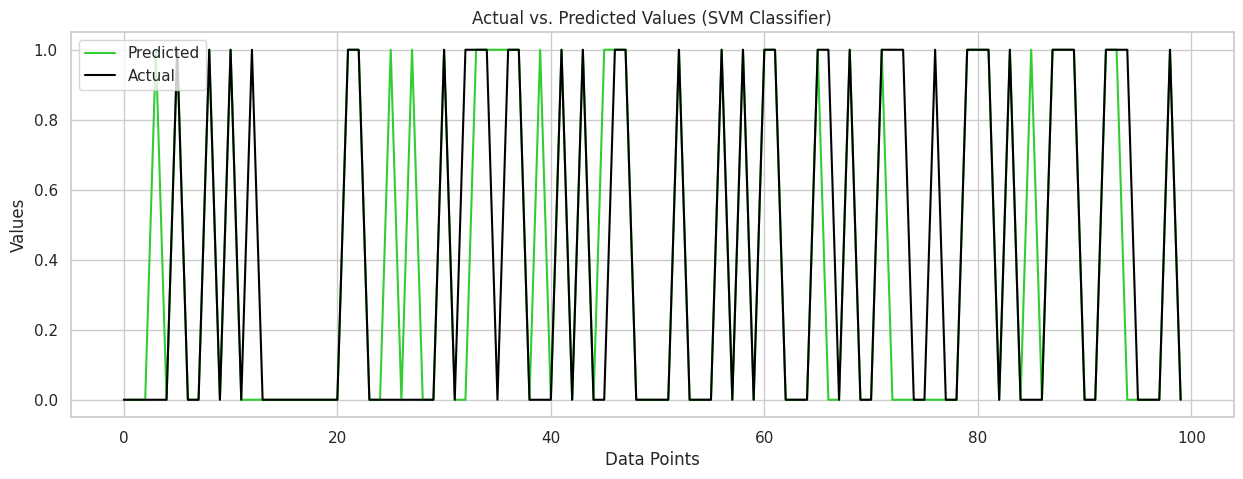

In [ ]:
# Visualizing the Predicted vs Actual Graph
plt.figure(figsize=(15, 5))

# Plotting the predicted values for the specific range
plt.plot(test_preds_svc[100:200],label="Predicted",color='limegreen')


# Plotting the actual values for the specific range
plt.plot(np.array(y_test[100:200]),label="Actual",color='black')

plt.legend(loc='upper left')
plt.title("Actual vs. Predicted Values (SVM Classifier)")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.show()

[]

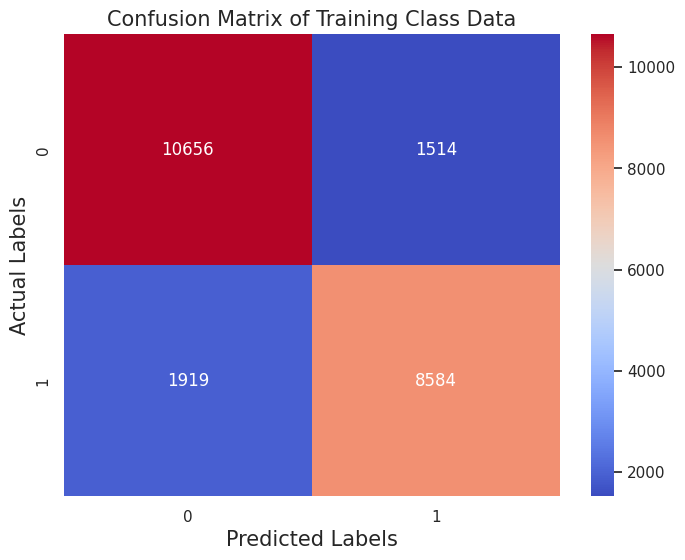

In [ ]:
# Plot the confusion matrix of Training Class

plt.figure(figsize=(8,6))
confuse_matrix_train_svc = confusion_matrix(y_train,train_preds_svc)

ax= plt.subplot()
sns.heatmap(confuse_matrix_train_svc, annot=True, fmt = 'd',ax = ax, cmap='coolwarm')
ax.set_xlabel('Predicted Labels',fontsize=15)
ax.set_ylabel('Actual Labels',fontsize=15)
ax.set_title('Confusion Matrix of Training Class Data',fontsize=15)
plt.plot()

[]

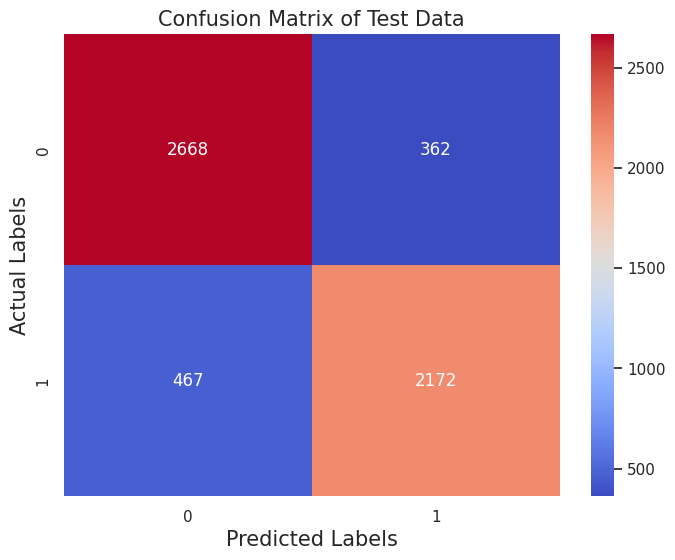

In [ ]:
# Plot the confusion matrix of Testing Class

plt.figure(figsize=(8,6))
confuse_matrix_test_svc = confusion_matrix(y_test,test_preds_svc)

ax= plt.subplot()
sns.heatmap(confuse_matrix_test_svc, annot=True, fmt = 'd',ax = ax, cmap='coolwarm')
ax.set_xlabel('Predicted Labels',fontsize=15)
ax.set_ylabel('Actual Labels',fontsize=15)
ax.set_title('Confusion Matrix of Test Data',fontsize=15)
plt.plot()

In [ ]:
# Visualizing evaluation Metric Score chart
print("Training Data")
print(classification_report(y_train, train_preds_svc))
print("\n")
print("Testing Data")
print(classification_report(y_test, test_preds_svc))

Training Data
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86     12170
         1.0       0.85      0.82      0.83     10503

    accuracy                           0.85     22673
   macro avg       0.85      0.85      0.85     22673
weighted avg       0.85      0.85      0.85     22673



Testing Data
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      3030
         1.0       0.86      0.82      0.84      2639

    accuracy                           0.85      5669
   macro avg       0.85      0.85      0.85      5669
weighted avg       0.85      0.85      0.85      5669



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Ans:** A Support Vector Machine (SVM) is a powerful and versatile machine learning algorithm used for both classification and regression tasks. It's particularly well-suited for classification problems. The primary goal of an SVM is to find the optimal hyperplane that best separates data points belonging to different classes in a way that maximizes the margin between these classes.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_grid = {'C':[0.01,0.1,1],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']}


# Fit the Algorithm
model_svc = SVC()
svc_grid = GridSearchCV(estimator = model_svc,
                       param_grid = param_grid,
                       cv = 3,
                       verbose=2,
                       n_jobs = -1)

svc_grid.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [ ]:
print(svc_grid.best_params_)
print(svc_grid.best_score_)

{'C': 0.1, 'kernel': 'rbf'}
0.8465134852513506


In [ ]:
# Predict on the model
train_tuned_svc_preds = svc_grid.predict(X_train)
test_tuned_svc_preds = svc_grid.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_tuned_svc = accuracy_score(train_tuned_svc_preds,y_train)
test_accuracy_tuned_svc = accuracy_score(test_tuned_svc_preds,y_test)

print("The accuracy on train data is ", train_accuracy_tuned_svc)
print("The accuracy on test data is ", test_accuracy_tuned_svc)

The accuracy on train data is  0.8485423190579103
The accuracy on test data is  0.8564120656200388


In [ ]:
# Applying Cross Validation on XGBoost Classifier Model
scores=cross_val_score(model_svc,X_train,y_train,cv=10,scoring='roc_auc')
cv_score=scores.mean()
print("Cross Validation Score is: ",cv_score)

Cross Validation Score is:  0.9148618552950445


##### Which hyperparameter optimization technique have you used and why?

**Ans:** The GridSearchCV is used as hyperparameter optimisation. The reason is that it exhaustively explores a given hyperparameter space to identify the perfect hyperparameter that would produce the greatest model performance.

In [ ]:
# Visualizing evaluation Metric Score chart after Hyperparameter Tuning
print("Training Data")
print(classification_report(y_train, train_tuned_svc_preds))
print("\n")
print("Testing Data")
print(classification_report(y_test, test_tuned_svc_preds))

Training Data
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86     12170
         1.0       0.85      0.82      0.83     10503

    accuracy                           0.85     22673
   macro avg       0.85      0.85      0.85     22673
weighted avg       0.85      0.85      0.85     22673



Testing Data
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      3030
         1.0       0.86      0.82      0.84      2639

    accuracy                           0.86      5669
   macro avg       0.86      0.85      0.86      5669
weighted avg       0.86      0.86      0.86      5669



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Ans:-** Definitely, we have seen an improvement in the accuracy score on test data compared to the earlier model used. The testing accuracy has increased to 86%, from 85% earlier.


**Plotting ROC_AUC Curve**

In [ ]:
model_svc=SVC(kernel='rbf',degree=3,C=0.1,gamma='scale',probability=True)
model_svc.fit(X_train,y_train)

SVC(C=0.1, probability=True)

In [ ]:
y_pred_proba=model_svc.predict_proba(X_test)[:,1]

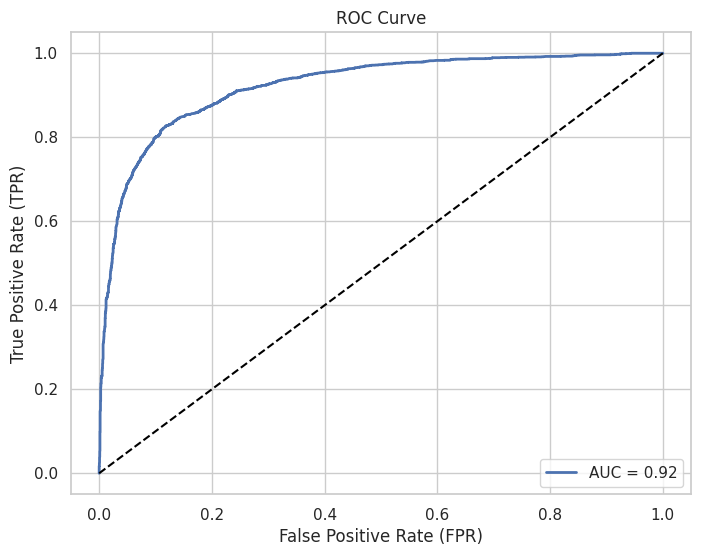

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Ans:** The choice of which evaluation metric to prioritize depends on the specific business problem and its associated costs and risks. Hence we should carefully consider these metrics to make informed decisions. High precision is valuable when minimizing false positives is critical, high recall is important when catching all positive cases is essential, and F1-Score provides a balanced perspective. High accuracy can be misleading in imbalanced datasets where  a high overall accuracy may hide poor performance in the minority class. Thus, we should consider accuracy along with precision, recall, and F1-Score to assess model performance comprehensively.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Ans:** The choice of the best model should consider the specific goals and requirements of the project, the interpretability of the model, and potential business implications.

Based on the provided metrics and considering the Accuracy score as a key criterion, the SVM Model appears to be the better choice for the final prediction model. It also has a higher Cross Validation score on the testing data compared to Random Forest Classifier.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Ans:** eli5 (Explain Like I'm 5) is the most commonly used model explainability tool to interpret the feature importance of a machine learning model.

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=df1278786b39ccbcc946b39f078fc99cbed4f5ceb09d77f7124d136b86d2bb8b
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# Linear Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

perm_importance_lr = PermutationImportance(model_lr, random_state=42).fit(X_test, y_test)

# Random Forest Regressor
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

perm_importance_rf = PermutationImportance(model_rf, random_state=42).fit(X_test, y_test)

# XGBoost Regressor
model_svc = SVC()
model_svc.fit(X_train, y_train)

perm_importance_svc = PermutationImportance(model_svc, random_state=42).fit(X_test, y_test)


In [ ]:
# Print model
print("Logistic Regression Model")
eli5.show_weights(perm_importance_lr, feature_names=X_test.columns.tolist())

Logistic Regression Model


Weight,Feature
0.0786 ± 0.0077,cabin_service
0.0742 ± 0.0045,ground_service
0.0487 ± 0.0057,seat_comfort
0.0221 ± 0.0027,food_bev
0.0040 ± 0.0029,entertainment
0.0019 ± 0.0012,solo leisure
0.0010 ± 0.0009,couple leisure
0.0005 ± 0.0002,family leisure
-0.0008 ± 0.0015,cabin


In [ ]:
# Print model
print("Random Forest Classifier Model")
eli5.show_weights(perm_importance_rf, feature_names=X_test.columns.tolist())

Random Forest Classifier Model


Weight,Feature
0.0805 ± 0.0048,ground_service
0.0756 ± 0.0084,cabin_service
0.0497 ± 0.0046,seat_comfort
0.0299 ± 0.0033,food_bev
0.0016 ± 0.0061,entertainment
0.0011 ± 0.0008,family leisure
-0.0030 ± 0.0017,couple leisure
-0.0034 ± 0.0014,solo leisure
-0.0040 ± 0.0042,cabin


In [ ]:
# Print model
print("SVM Classifier Model")
eli5.show_weights(perm_importance_svc, feature_names=X_test.columns.tolist())

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
!pip install joblib

In [ ]:
# Save the File
import joblib

#Random Forest Regressor model
best_model = model_svc

# Specify the file path to save the model
model_filename = 'best_model_svc.joblib'

# Save the model to the file
joblib.dump(best_model, model_filename)

print(f"Model saved as {model_filename}")

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
loaded_model = joblib.load(model_filename)
# Now, you can use loaded_model for predictions

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, our exploration into the Airline Passenger Referral Prediction dataset has been a comprehensive and enlightening journey into the world of machine learning and predictive analytics. Utilizing the strengths of three distinct models—Logistic Regression, SVM Classifier, and Random Forest—we have effectively addressed the challenge of predicting passenger referrals, a crucial aspect in enhancing airline operations and passenger experiences.

Key insights from this project include:

**Logistic Regression:** This model served as a robust starting point for our analysis, offering simplicity and interpretability. It provided valuable insights into how various factors influence passenger referrals, aiding in informed decision-making.

**SVM Classifier:** The SVM Classifier demonstrated its prowess in handling complex relationships within the data. Its ability to identify intricate patterns that simpler models might overlook resulted in high predictive accuracy.

**Random Forest:** The Random Forest model, a collection of decision trees, excelled in both predictive accuracy and feature importance. Its ability to model non-linear relationships and highlight key drivers of passenger referrals made it an invaluable tool in this project.

The combination of these three models not only improved the predictive accuracy of our system but also offered a comprehensive understanding of the factors influencing passenger referrals. This knowledge is vital for airlines in refining their strategies, enhancing customer interactions, and ultimately improving their services.

Moreover, the insights gained from this classification project extend beyond the airline industry. The methodologies used and lessons learned can be applied to various sectors where classification and predictive modeling are key components of decision-making.

In summary, our classification project on the Airline Passenger Referral Prediction dataset has provided us with the necessary tools and insights to tackle complex prediction tasks. It highlights the importance of model diversity in achieving optimal results and stands as a testament to the power of data-driven decision-making in improving operational efficiency and customer satisfaction in the airline industry and beyond.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***